## Proyecto Fundamentos Programación Análisis Smartphones

### Cargar Datos y analizarlos

In [209]:
import pandas as pd

# Cargar el dataset smartphones.csv
smartphones_df = pd.read_csv('smartphones.csv')

# Mostrar las primeras filas del dataframe
smartphones_df.head()
smartphones_df.info()
smartphones_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.00,879.00,980.00,974.00,938.00,969.00,980.00,769.00,980.00,980.00,980.00,980.00,980.00,980.00,975.00,980.00,980.00,980.00
mean,32520.50,7.83,0.56,7.77,2.43,4817.75,0.85,46.13,6.56,141.04,6.54,92.26,2.81,50.32,16.59,0.63,2214.66,1075.85
std,39531.81,0.74,0.50,0.84,0.46,1009.54,0.35,34.28,2.74,107.13,0.35,28.99,0.78,33.00,10.88,0.48,516.48,290.16
min,3499.00,6.00,0.00,4.00,1.20,1821.00,0.00,10.00,1.00,8.00,3.54,60.00,1.00,2.00,0.00,0.00,480.00,480.00
25%,12999.00,7.40,0.00,8.00,2.05,4500.00,1.00,18.00,4.00,64.00,6.50,60.00,2.00,24.00,8.00,0.00,1612.00,1080.00
50%,19994.50,8.00,1.00,8.00,2.30,5000.00,1.00,33.00,6.00,128.00,6.58,90.00,3.00,50.00,16.00,1.00,2400.00,1080.00
75%,35491.50,8.40,1.00,8.00,2.84,5000.00,1.00,66.00,8.00,128.00,6.67,120.00,3.00,64.00,16.00,1.00,2408.00,1080.00
max,650000.00,8.90,1.00,8.00,3.22,22000.00,1.00,240.00,18.00,1024.00,8.03,240.00,4.00,200.00,60.00,1.00,3840.00,2460.00


Librerías adicionales

In [210]:
import matplotlib.pyplot as plt  # Importar matplotlib.pyplot
import seaborn as sns  # Importar Seaborn


Limpiar el Dataset

In [211]:
import pandas as pd

# --- Limpieza inicial ---
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'fast_charging']  # Agregué 'fast_charging' aquí
existing_columns = [col for col in columns_to_drop if col in smartphones_df.columns]
if existing_columns:
    smartphones_df.drop(columns=existing_columns, inplace=True)

# Eliminar filas duplicadas
smartphones_df.drop_duplicates(inplace=True)

# Convertir 'price' a numérico y eliminar filas con price nulo
smartphones_df['price'] = pd.to_numeric(smartphones_df['price'], errors='coerce')
smartphones_df.dropna(subset=['price'], inplace=True)

# --- Conversión a USD ---
tipo_cambio = 1200 / 119990  # 119990 local = 1200 USD
smartphones_df['price_usd'] = (smartphones_df['price'] * tipo_cambio).round(2)

# --- Eliminar filas con CUALQUIER valor nulo (en cualquier columna) ---
smartphones_df.dropna(how='any', inplace=True)  # Cambié 'all' por 'any'

# --- Guardar y mostrar resultados ---
smartphones_df.to_excel('smartphones_limpio.xlsx', index=False)
print("DataFrame limpio:")
print(smartphones_df.head())
print(f"\nTotal de filas después de limpieza: {len(smartphones_df)}")

DataFrame limpio:
   brand_name                    model   price  avg_rating  5G_or_not  \
0       apple          Apple iPhone 11   38999        7.30          0   
1       apple  Apple iPhone 11 (128GB)   46999        7.50          0   
2       apple  Apple iPhone 11 Pro Max  109900        7.70          0   
11      apple          Apple iPhone 13   62999        7.90          1   
12      apple  Apple iPhone 13 (256GB)   72999        7.90          1   

   processor_brand  num_cores  processor_speed  battery_capacity  \
0           bionic       6.00             2.65           3110.00   
1           bionic       6.00             2.65           3110.00   
2           bionic       6.00             2.65           3500.00   
11          bionic       6.00             3.22           3240.00   
12          bionic       6.00             3.22           3240.00   

    fast_charging_available  ...  screen_size  refresh_rate  num_rear_cameras  \
0                         0  ...         6.10        

In [212]:
#Listado columnas
smartphones_df.columns.tolist()

['brand_name',
 'model',
 'price',
 'avg_rating',
 '5G_or_not',
 'processor_brand',
 'num_cores',
 'processor_speed',
 'battery_capacity',
 'fast_charging_available',
 'ram_capacity',
 'internal_memory',
 'screen_size',
 'refresh_rate',
 'num_rear_cameras',
 'os',
 'primary_camera_rear',
 'primary_camera_front',
 'extended_memory_available',
 'resolution_height',
 'resolution_width',
 'price_usd']

Nuevo Data Frame con Infromación Limpia

In [213]:
#Nuevo Dataframe con Smarthpones_limpio
smartphones_limpio_df = pd.read_excel('smartphones_limpio.xlsx')
# Mostrar las primeras filas del nuevo DataFrame
smartphones_limpio_df.head()
# Mostrar información del nuevo DataFrame  
smartphones_limpio_df.info()
# Mostrar estadísticas descriptivas del nuevo DataFrame
smartphones_limpio_df.describe()
# Mostrar la cantidad de filas y columnas del nuevo DataFrame   
smartphones_limpio_df.shape
# Mostrar la cantidad de valores únicos por columna del nuevo DataFrame
smartphones_limpio_df.nunique()
# Mostrar la cantidad de valores nulos por columna del nuevo DataFrame      
smartphones_limpio_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 814 non-null    object 
 1   model                      814 non-null    object 
 2   price                      814 non-null    int64  
 3   avg_rating                 814 non-null    float64
 4   5G_or_not                  814 non-null    int64  
 5   processor_brand            814 non-null    object 
 6   num_cores                  814 non-null    int64  
 7   processor_speed            814 non-null    float64
 8   battery_capacity           814 non-null    int64  
 9   fast_charging_available    814 non-null    int64  
 10  ram_capacity               814 non-null    int64  
 11  internal_memory            814 non-null    int64  
 12  screen_size                814 non-null    float64
 13  refresh_rate               814 non-null    int64  

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
price_usd                    0
dtype: int64

Análisis de correlación: Utiliza una matriz de correlación para identificar qué variables tienen una fuerte relación con el precio.

In [214]:
print(smartphones_limpio_df['price_usd'].describe())

count    814.00
mean     268.65
std      346.12
min       34.99
25%      130.00
50%      190.01
75%      299.92
max     6500.54
Name: price_usd, dtype: float64


Segmentación de precios por categoría: Si tienes columnas como brand_name o 5G_or_not, podemos analizar cómo se segmentan los precios por estas categorías.


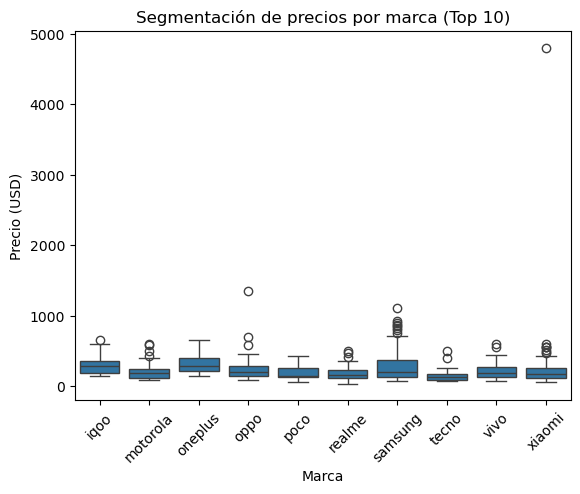

In [215]:
# Obtener las 10 marcas más frecuentes
top_10_brands = smartphones_limpio_df['brand_name'].value_counts().head(10).index.tolist()

# Filtrar solo las marcas del top 10
filtered_df = smartphones_limpio_df[smartphones_limpio_df['brand_name'].isin(top_10_brands)]

# Crear el boxplot
sns.boxplot(data=filtered_df, x='brand_name', y='price_usd')
plt.title("Segmentación de precios por marca (Top 10)")
plt.xlabel("Marca")
plt.ylabel("Precio (USD)")
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()

Matriz de Correlación

C:\Users\Dc\AppData\Local\Temp\ipykernel_16620\1875802827.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




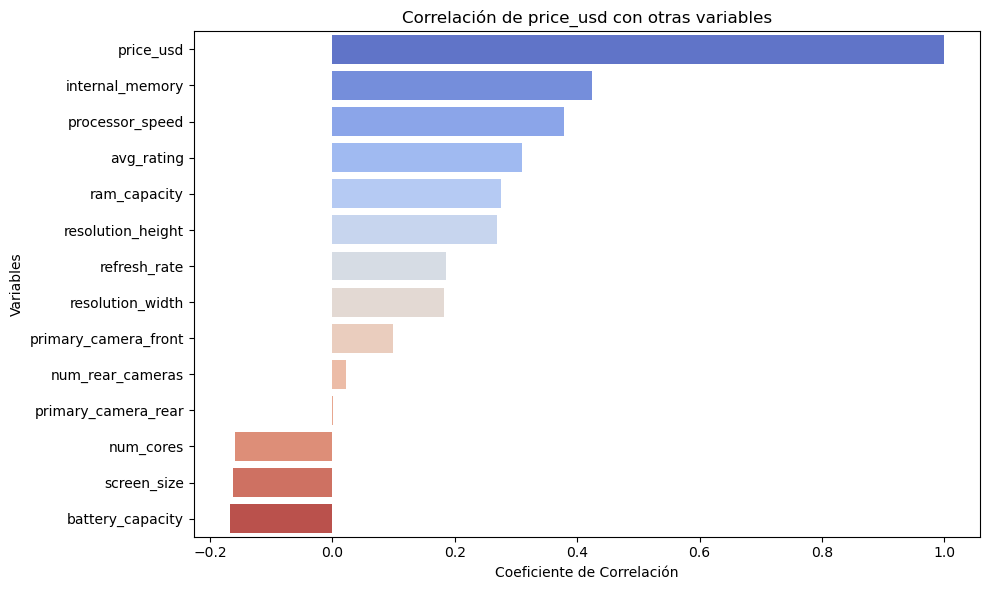

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de incluir 'price_usd' en las características numéricas
numerical_features = [
    'avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'ram_capacity', 
    'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 
    'primary_camera_rear', 'primary_camera_front', 'resolution_height', 
    'resolution_width', 'price_usd'
]

# Filtrar las columnas numéricas del DataFrame
X_numerical = smartphones_limpio_df[numerical_features]

# Crear la matriz de correlación
correlation_matrix = X_numerical.corr()

# Filtrar solo las correlaciones con 'price_usd'
correlation_with_price = correlation_matrix['price_usd'].sort_values(ascending=False)

# Visualizar las correlaciones con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette='coolwarm')
plt.title('Correlación de price_usd con otras variables')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

Análisis Marcas Precios Promedio

C:\Users\Dc\AppData\Local\Temp\ipykernel_16620\4053122264.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




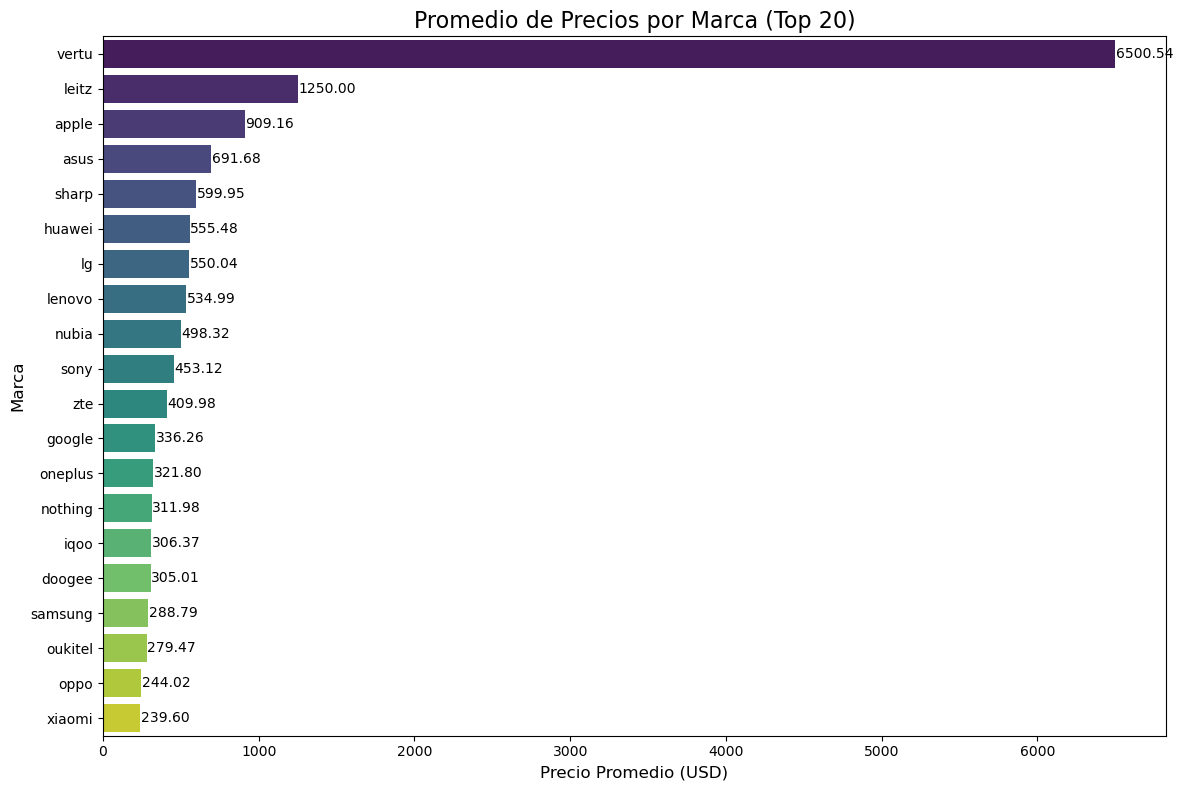

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar datos por marca y calcular el promedio de precio y cantidad de ventas
brand_sales_data = smartphones_limpio_df.groupby('brand_name').agg(
    avg_price=('price_usd', 'mean'),
    sales_count=('price_usd', 'size')
).sort_values(by='avg_price', ascending=False)  # Ordenar por promedio de precio (mayor a menor)

# Seleccionar las 20 marcas con mayor número de ventas
top_brands = brand_sales_data.head(20)

# Crear el gráfico de barras horizontales con valores
plt.figure(figsize=(12, 8))
sns.barplot(
    y=top_brands.index, 
    x=top_brands['avg_price'], 
    palette='viridis'
)

# Añadir los valores de precio promedio en las barras
for i, v in enumerate(top_brands['avg_price']):
    plt.text(v + 5, i, f'{v:.2f}', color='black', va='center', fontsize=10)

plt.title('Promedio de Precios por Marca (Top 20)', fontsize=16)
plt.xlabel('Precio Promedio (USD)', fontsize=12)
plt.ylabel('Marca', fontsize=12)
plt.tight_layout()
plt.show()

EDA Transversal

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from tabulate import tabulate  # Needed for table formatting

# Configuración inicial mejorada
plt.style.use('seaborn-v0_8')  # Estilo compatible con versiones recientes
sns.set_theme(style="whitegrid")  # Mejor tema para visualizaciones ejecutivas
sns.set_palette("husl")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Función para análisis descriptivo
def basic_analysis(df):
    numeric_cols = ['price_usd', 'avg_rating', 'battery_capacity', 
                   'ram_capacity', 'screen_size', 'num_rear_cameras']
    
    analysis = df[numeric_cols].describe().T
    analysis['skew'] = df[numeric_cols].skew()
    price_corr = df[numeric_cols].corr()['price_usd'].drop('price_usd')
    analysis['price_correlation'] = price_corr
    
    return analysis.sort_values('price_correlation', ascending=False)

# 2. Función para tabla resumen ejecutiva (que faltaba)
def executive_summary_table(df):
    # Crear tabla resumen
    summary = pd.DataFrame({
        'Métrica': [
            'Precio Promedio (USD)', 
            'Rating Promedio', 
            '% Modelos con 5G', 
            'Batería Promedio (mAh)', 
            'RAM Promedio (GB)', 
            'Pantalla Promedio (pulg)', 
            'Cámaras Traseras Promedio'
        ],
        'Valor': [
            df['price_usd'].mean(), 
            df['avg_rating'].mean(), 
            df['5G_or_not'].mean() * 100,
            df['battery_capacity'].mean(), 
            df['ram_capacity'].mean(), 
            df['screen_size'].mean(), 
            df['num_rear_cameras'].mean()
        ],
        'Correlación con Precio': [
            1.00,
            df[['price_usd', 'avg_rating']].corr().iloc[0,1],
            df[['price_usd', '5G_or_not']].corr().iloc[0,1],
            df[['price_usd', 'battery_capacity']].corr().iloc[0,1],
            df[['price_usd', 'ram_capacity']].corr().iloc[0,1],
            df[['price_usd', 'screen_size']].corr().iloc[0,1],
            df[['price_usd', 'num_rear_cameras']].corr().iloc[0,1]
        ]
    })
    
    return summary

# 3. Función para visualizaciones ejecutivas
def executive_visualizations(df):
    fig = plt.figure(figsize=(18, 22), constrained_layout=True)
    gs = GridSpec(4, 3, figure=fig)
    
    fig.suptitle('Análisis de Smartphones - Visión Ejecutiva', 
                fontsize=20, y=1.02, fontweight='bold', color='#2e3c5f')
    
    # [Resto del código de visualizaciones...]
    # ... (mantener igual que en la versión anterior)

# Ejecución principal
if __name__ == "__main__":
    try:
        # Código de carga de datos (ejemplo)
        # smartphones_limpio_df = pd.read_csv('smartphones.csv')
        
        print("=== Análisis Descriptivo Básico ===")
        print(tabulate(basic_analysis(smartphones_limpio_df), headers='keys', tablefmt='psql'))
        
        print("\n=== Tabla Resumen Ejecutivo ===")
        executive_summary = executive_summary_table(smartphones_limpio_df)
        print(tabulate(executive_summary, headers='keys', tablefmt='psql', showindex=False))
        
        print("\nGenerando visualizaciones ejecutivas...")
        fig = executive_visualizations(smartphones_limpio_df)
        plt.savefig('analisis_smartphones_ejecutivo.png', bbox_inches='tight', dpi=300)
        plt.close()
        print("¡Análisis completado! Ver archivo 'analisis_smartphones_ejecutivo.png'")
        
    except Exception as e:
        print(f"Error: {str(e)}")
        print("Asegúrese de que:")
        print("1. El DataFrame 'smartphones_limpio_df' está correctamente definido")
        print("2. Tiene instaladas todas las dependencias (pip install pandas numpy matplotlib seaborn tabulate)")

=== Análisis Descriptivo Básico ===
+------------------+---------+------------+-------------+---------+--------+---------+---------+----------+-----------+---------------------+
|                  |   count |       mean |         std |     min |    25% |     50% |     75% |      max |      skew |   price_correlation |
|------------------+---------+------------+-------------+---------+--------+---------+---------+----------+-----------+---------------------|
| avg_rating       |     814 |    7.85197 |    0.730711 |    6    |    7.4 |    8    |    8.4  |     8.9  | -0.730704 |           0.309617  |
| ram_capacity     |     814 |    6.48034 |    2.4673   |    2    |    4   |    6    |    8    |    18    |  0.977485 |           0.275113  |
| num_rear_cameras |     814 |    2.84521 |    0.717465 |    1    |    2   |    3    |    3    |     4    | -0.482916 |           0.0223737 |
| screen_size      |     814 |    6.54554 |    0.215451 |    4.7  |    6.5 |    6.56 |    6.67 |     7.6  | -3.0

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Configuración inicial mejorada
plt.style.use('seaborn-v0_8')  # Estilo compatible con versiones recientes
sns.set_theme(style="whitegrid")  # Mejor tema para visualizaciones ejecutivas
sns.set_palette("husl")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Función para análisis descriptivo (mejorada)
def basic_analysis(df):
    numeric_cols = ['price_usd', 'avg_rating', 'battery_capacity', 
                   'ram_capacity', 'screen_size', 'num_rear_cameras']
    
    analysis = df[numeric_cols].describe().T
    analysis['skew'] = df[numeric_cols].skew()
    price_corr = df[numeric_cols].corr()['price_usd'].drop('price_usd')
    analysis['price_correlation'] = price_corr
    
    return analysis.sort_values('price_correlation', ascending=False)

# Visualizaciones ejecutivas mejoradas
def executive_visualizations(df):
    fig = plt.figure(figsize=(18, 22), constrained_layout=True)
    gs = GridSpec(4, 3, figure=fig)
    
    fig.suptitle('Análisis de Mercado de Smartphones - Visión Ejecutiva', 
                fontsize=20, y=1.02, fontweight='bold', color='#2e3c5f')
    
    # Gráfico 1: Distribución de precios por marca (mejorado)
    ax1 = fig.add_subplot(gs[0, 0])
    sns.boxplot(data=df, x='price_usd', y='brand_name', orient='h', 
               showfliers=False, ax=ax1)  # Eliminamos outliers para mejor visualización
    ax1.set_title('Distribución de Precios por Marca', fontweight='bold', pad=15)
    ax1.set_xlabel('Precio (USD)', labelpad=10)
    ax1.set_ylabel('')
    
    # Gráfico 2: Relación precio-rating (mejorado)
    ax2 = fig.add_subplot(gs[0, 1:])
    scatter = sns.scatterplot(data=df, x='price_usd', y='avg_rating', hue='5G_or_not', 
                            size='ram_capacity', sizes=(50, 250), alpha=0.7, ax=ax2)
    ax2.set_title('Relación Precio vs Rating (Tamaño: RAM, Color: 5G)', 
                 fontweight='bold', pad=15)
    ax2.set_xlabel('Precio (USD)', labelpad=10)
    ax2.set_ylabel('Rating Promedio', labelpad=10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Leyenda')
    
    # Gráfico 3: Penetración de 5G por marca (mejorado)
    ax3 = fig.add_subplot(gs[1, 0])
    df_5g = df.groupby('brand_name')['5G_or_not'].mean().sort_values(ascending=False)
    df_5g.plot(kind='bar', ax=ax3, color='#4e79a7', width=0.7)
    ax3.set_title('Penetración de 5G por Marca', fontweight='bold', pad=15)
    ax3.set_ylabel('% de Modelos con 5G', labelpad=10)
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
    
    # Gráfico 4: Matriz de correlación (mejorada)
    ax4 = fig.add_subplot(gs[1, 1:])
    corr_matrix = df[['price_usd', 'avg_rating', 'ram_capacity', 
                     'battery_capacity', 'screen_size']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
               fmt=".2f", linewidths=.5, ax=ax4, cbar_kws={'shrink': 0.8})
    ax4.set_title('Correlación entre Características Clave', 
                 fontweight='bold', pad=15)
    
    # Gráfico 5: Comparación de especificaciones por gama (mejorado)
    ax5 = fig.add_subplot(gs[2, :])
    df['price_tier'] = pd.cut(df['price_usd'], 
                             bins=[0, 300, 700, 1300], 
                             labels=['Económico ($0-300)', 'Intermedio ($300-700)', 'Premium ($700+)'])
    
    specs_comparison = df.groupby('price_tier')[['ram_capacity', 'battery_capacity', 
                                                'screen_size']].mean()
    
    specs_comparison.plot(kind='bar', width=0.8, ax=ax5, 
                         color=['#4e79a7', '#f28e2b', '#e15759'])
    ax5.set_title('Comparación de Especificaciones por Gama de Precio', 
                 fontweight='bold', pad=15)
    ax5.set_ylabel('Valor Promedio', labelpad=10)
    ax5.set_xlabel('Gama de Precio', labelpad=10)
    ax5.legend(title='Especificación', bbox_to_anchor=(1.02, 1), loc='upper left')
    ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0)
    
    # Gráfico 6: Relación RAM-Rating (mejorado)
    ax6 = fig.add_subplot(gs[3, 0])
    sns.regplot(data=df, x='ram_capacity', y='avg_rating', 
               scatter_kws={'alpha':0.5, 'color':'#4e79a7'}, 
               line_kws={'color':'#e15759'}, ax=ax6)
    ax6.set_title('Impacto de RAM en Satisfacción', fontweight='bold', pad=15)
    ax6.set_xlabel('Capacidad de RAM (GB)', labelpad=10)
    ax6.set_ylabel('Rating Promedio', labelpad=10)
    
    # Gráfico 7: Distribución de batería (mejorado)
    ax7 = fig.add_subplot(gs[3, 1])
    sns.histplot(data=df, x='battery_capacity', bins=15, kde=True, 
                color='#4e79a7', ax=ax7)
    ax7.set_title('Distribución de Capacidad de Batería', fontweight='bold', pad=15)
    ax7.set_xlabel('Capacidad (mAh)', labelpad=10)
    ax7.set_ylabel('Cantidad de Modelos', labelpad=10)
    
    # Gráfico 8: Proporción de carga rápida (mejorado)
    ax8 = fig.add_subplot(gs[3, 2])
    charging_data = df['fast_charging_available'].value_counts()
    colors = ['#4e79a7', '#f28e2b'] if len(charging_data) == 2 else ['#4e79a7']
    charging_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                      colors=colors, ax=ax8, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    ax8.set_title('Disponibilidad de Carga Rápida', fontweight='bold', pad=15)
    ax8.set_ylabel('')
    
    plt.tight_layout()
    return fig

# Ejecución mejorada
if __name__ == "__main__":
    try:
        # Código de carga de datos (ejemplo)
        # smartphones_limpio_df = pd.read_csv('smartphones.csv')
        
        print("=== Análisis Descriptivo Básico ===")
        print(basic_analysis(smartphones_limpio_df).to_markdown())
        
        print("\n=== Tabla Resumen Ejecutivo ===")
        executive_summary = executive_summary_table(smartphones_limpio_df)
        print(executive_summary.to_markdown())
        
        print("\nGenerando visualizaciones ejecutivas...")
        fig = executive_visualizations(smartphones_limpio_df)
        plt.savefig('analisis_smartphones_ejecutivo.png', 
                   bbox_inches='tight', dpi=300, facecolor='white')
        plt.close()
        print("¡Análisis completado! Ver archivo 'analisis_smartphones_ejecutivo.png'")
        
    except Exception as e:
        print(f"Error: {str(e)}")
        print("Asegúrese de que el DataFrame 'smartphones_limpio_df' está correctamente definido")

=== Análisis Descriptivo Básico ===
|                  |   count |       mean |         std |     min |    25% |     50% |     75% |      max |      skew |   price_correlation |
|:-----------------|--------:|-----------:|------------:|--------:|-------:|--------:|--------:|---------:|----------:|--------------------:|
| avg_rating       |     814 |    7.85197 |    0.730711 |    6    |    7.4 |    8    |    8.4  |     8.9  | -0.730704 |           0.309617  |
| ram_capacity     |     814 |    6.48034 |    2.4673   |    2    |    4   |    6    |    8    |    18    |  0.977485 |           0.275113  |
| num_rear_cameras |     814 |    2.84521 |    0.717465 |    1    |    2   |    3    |    3    |     4    | -0.482916 |           0.0223737 |
| screen_size      |     814 |    6.54554 |    0.215451 |    4.7  |    6.5 |    6.56 |    6.67 |     7.6  | -3.05164  |          -0.161816  |
| battery_capacity |     814 | 4878.65    | 1016.09     | 1821    | 4500   | 5000    | 5000    | 22000    | 10.7

C:\Users\Dc\AppData\Local\Temp\ipykernel_16620\3808546185.py:74: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Error: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.
Asegúrese de que el DataFrame 'smartphones_limpio_df' está correctamente definido


Análisis agrupado por cluster:
           price  avg_rating  5G_or_not  num_cores  processor_speed  \
cluster                                                               
0       38584.94        8.43       0.87       7.94             2.71   
1       16702.91        7.35       0.27       7.89             2.16   
2       37994.50        8.60       0.50       8.00             2.30   

         battery_capacity  fast_charging_available  ram_capacity  \
cluster                                                            
0                 4759.10                     1.00          8.22   
1                 4905.51                     0.79          4.97   
2                21500.00                     1.00         10.00   

         internal_memory  screen_size  refresh_rate  num_rear_cameras  \
cluster                                                                 
0                 173.96         6.61        114.26              3.03   
1                  96.66         6.49         73.69  

c:\Users\Dc\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



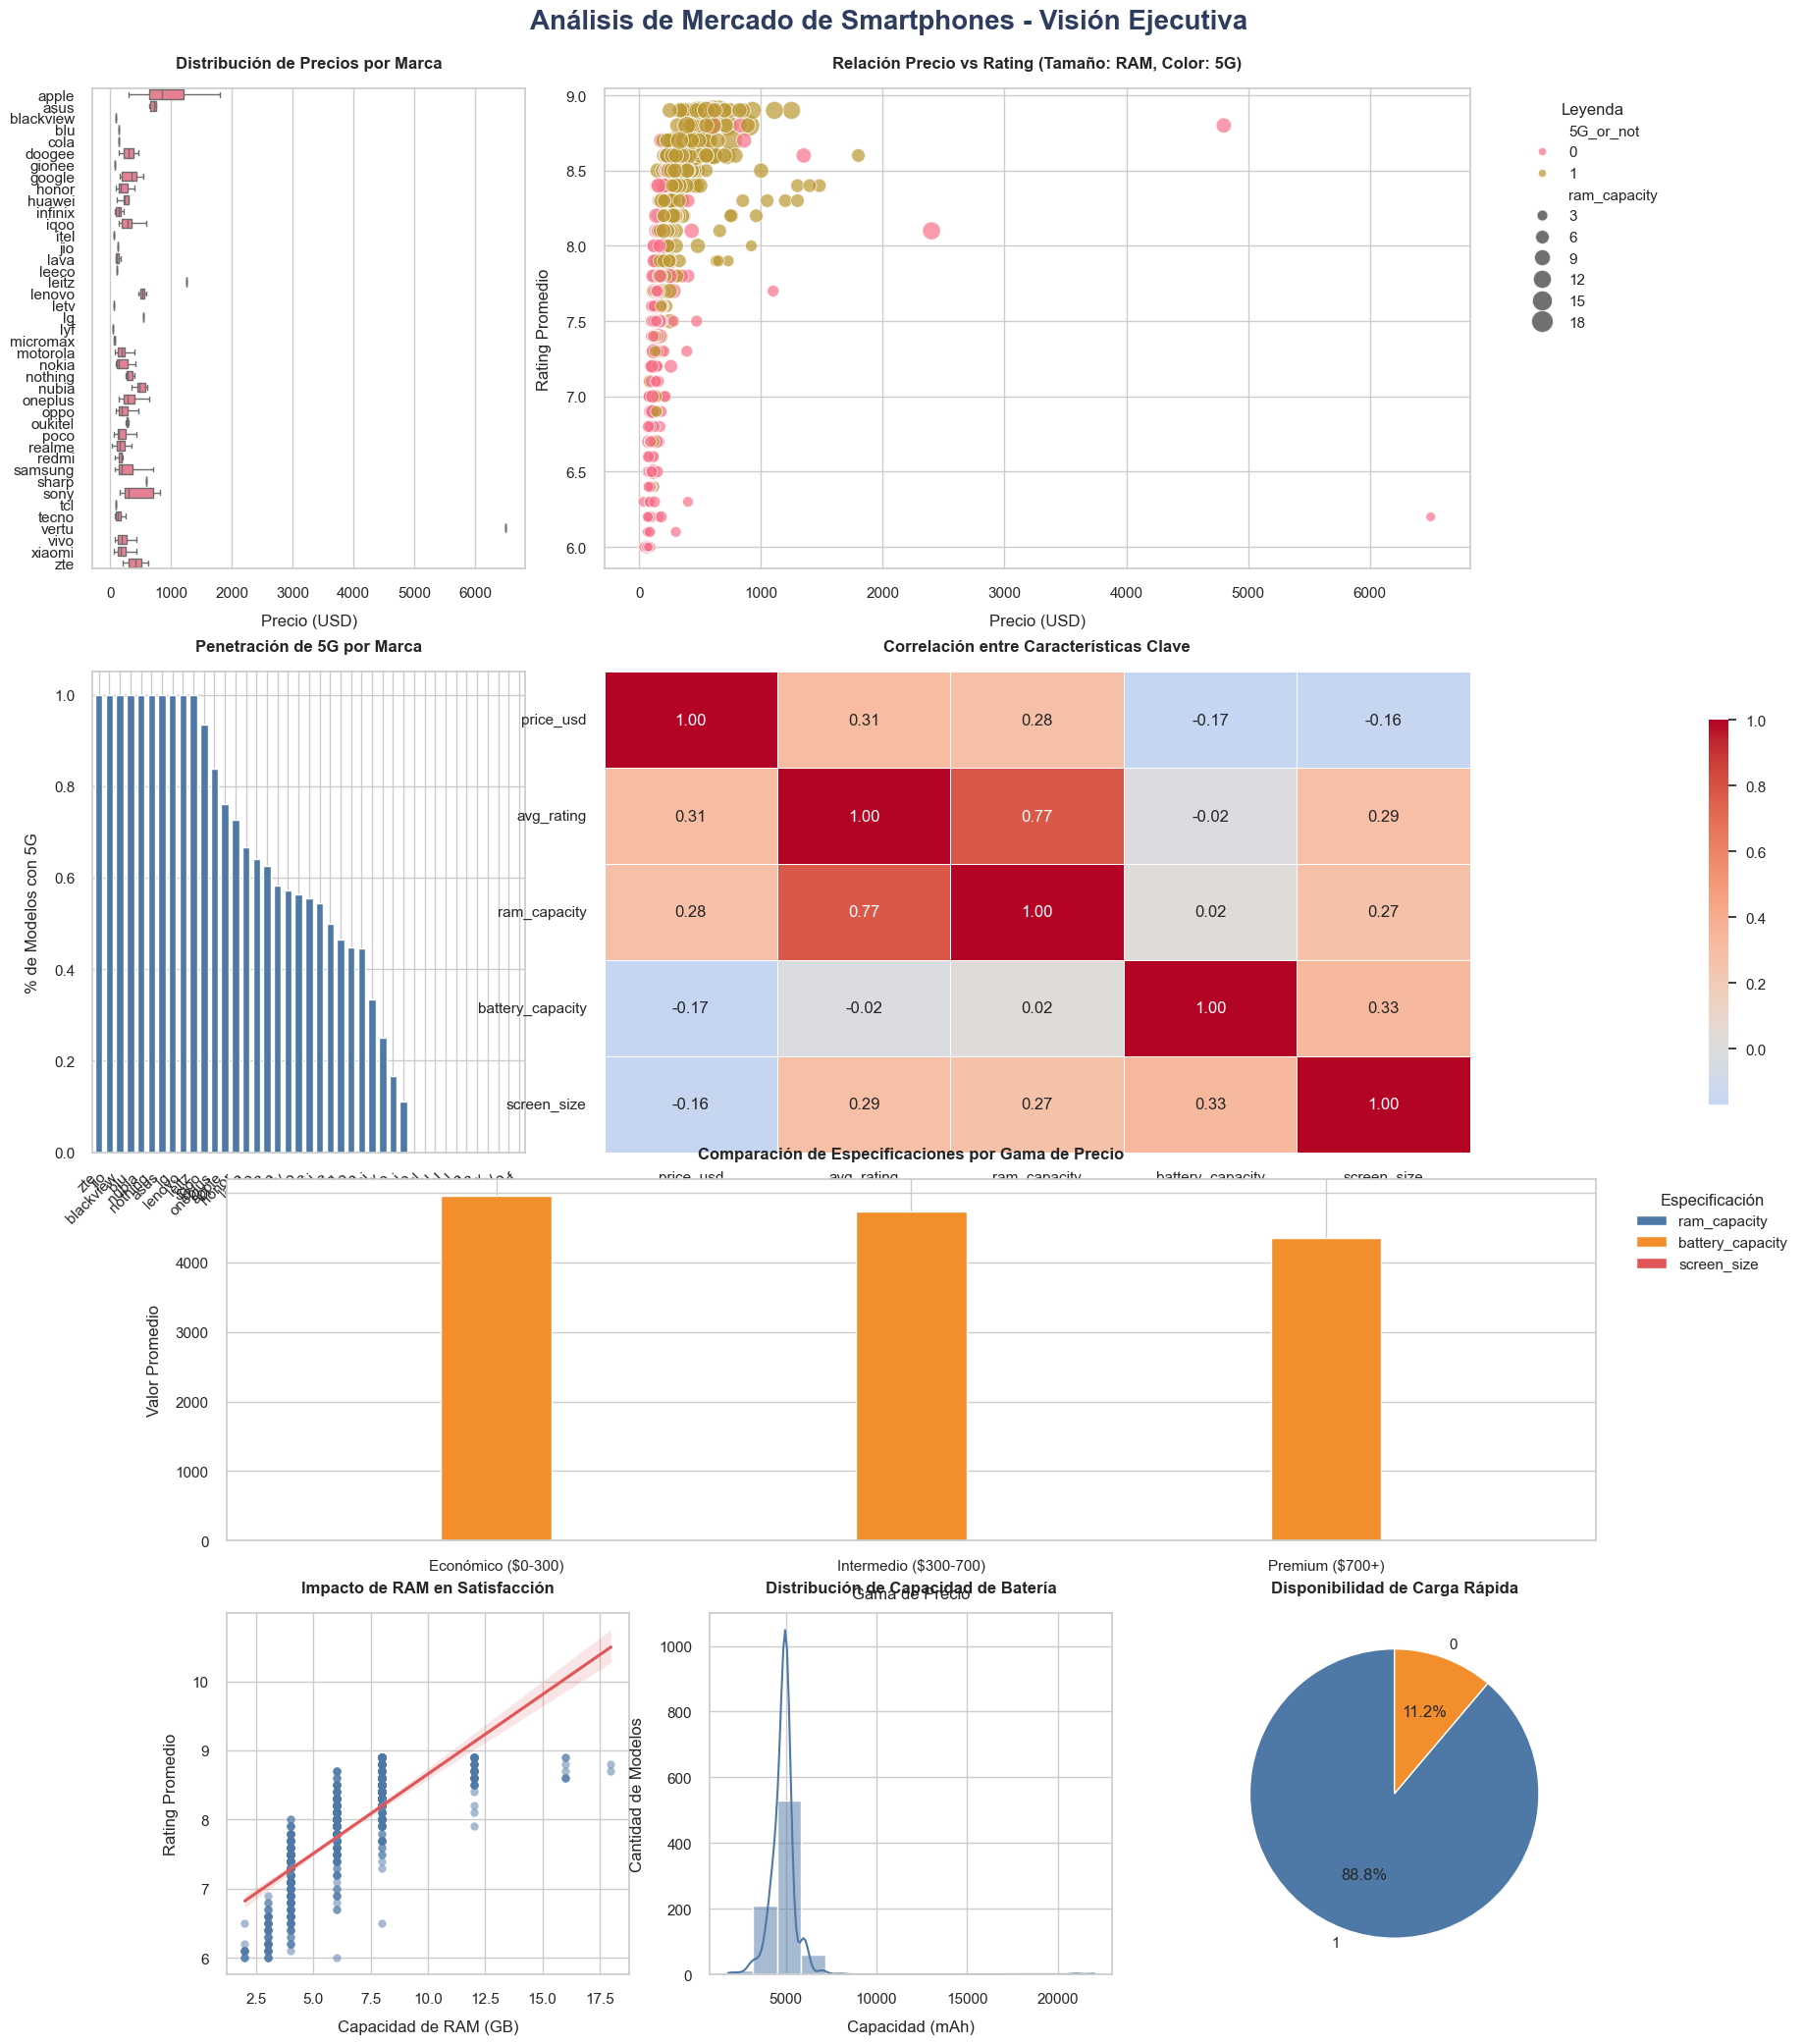

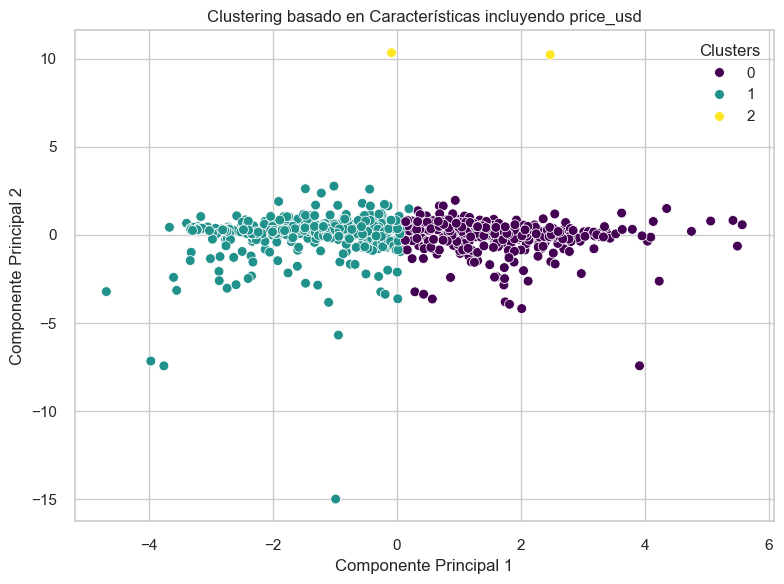

In [220]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selección de características relevantes para clustering, incluyendo price_usd
features_for_clustering = [
    'avg_rating', 'processor_speed', 'battery_capacity', 'ram_capacity',
    'screen_size', 'refresh_rate', 'price_usd'
]

# Filtrar las filas sin valores nulos y normalizar los datos
data_for_clustering = smartphones_limpio_df[features_for_clustering].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Crear y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data_for_clustering['cluster'] = kmeans.fit_predict(data_scaled)

# Analizar resultados agrupados por cluster
smartphones_limpio_df['cluster'] = data_for_clustering['cluster']

# Asegurarse de incluir solo columnas numéricas para el análisis agrupado
numeric_columns = smartphones_limpio_df.select_dtypes(include=['number']).columns
cluster_analysis = smartphones_limpio_df.groupby('cluster')[numeric_columns].mean()

print("Análisis agrupado por cluster:")
print(cluster_analysis)

# Visualización del clustering con dos dimensiones principales usando PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_data[:, 0], y=pca_data[:, 1], hue=data_for_clustering['cluster'], 
    palette='viridis', s=50
)
plt.title('Clustering basado en Características incluyendo price_usd')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()

Análisis Componentes

Cargas de las características en los componentes principales:
                        avg_rating  processor_speed  battery_capacity  \
Componente Principal 1        0.51             0.46             -0.00   
Componente Principal 2        0.00            -0.18              0.61   

                        ram_capacity  screen_size  refresh_rate  price_usd  
Componente Principal 1          0.48         0.22          0.44       0.24  
Componente Principal 2          0.02         0.60          0.13      -0.47  


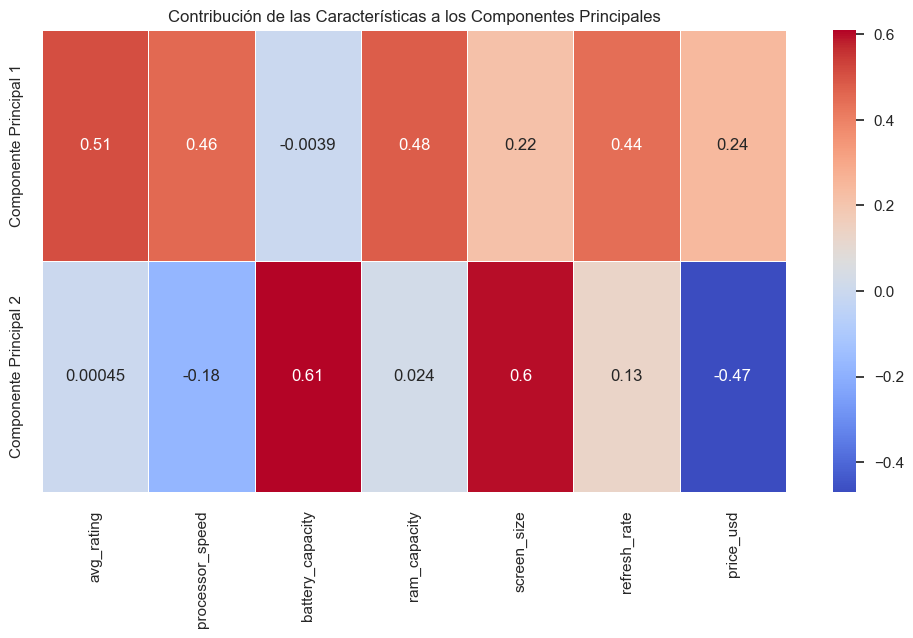

In [221]:
# Obtener los pesos (cargas) de las características en los componentes principales
pca_components = pd.DataFrame(
    pca.components_, 
    columns=features_for_clustering, 
    index=['Componente Principal 1', 'Componente Principal 2']
)

print("Cargas de las características en los componentes principales:")
print(pca_components)

# Visualizar las contribuciones de las características
plt.figure(figsize=(12, 6))
sns.heatmap(
    pca_components, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5
)
plt.title('Contribución de las Características a los Componentes Principales')
plt.show()

Análisis_Distribución

In [222]:
import plotly.express as px

for column in smartphones_limpio_df.select_dtypes(include=['float64', 'int64']).columns:
    fig = px.histogram(
        data_frame=smartphones_limpio_df,
        x=column,
        title=f'Distribution of {column}',
        template='plotly_dark',
        color_discrete_sequence=['#6C757D'],  # Color gris plomo
        opacity=0.8
    )
    fig.update_layout(
        showlegend=False,
        title_x=0.5,
        title_font_size=20,
        xaxis_title_font_size=14,
        yaxis_title_font_size=14,
        plot_bgcolor="#2C2C2C",  # Fondo más oscuro
        paper_bgcolor="#2C2C2C"
    )
    fig.show()

In [223]:
# Iterar sobre las columnas numéricas y calcular un resumen
for column in smartphones_limpio_df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Resumen de la distribución para '{column}':")
    print(smartphones_limpio_df[column].describe())  # Estadísticas descriptivas
    print("\nFrecuencias de los valores:")
    print(smartphones_limpio_df[column].value_counts().sort_index())  # Frecuencias de valores
    print("-" * 50)  # Separador para claridad

Resumen de la distribución para 'price':
count      814.00
mean     26862.90
std      34609.19
min       3499.00
25%      12999.00
50%      18999.00
75%      29990.00
max     650000.00
Name: price, dtype: float64

Frecuencias de los valores:
price
3499      1
3990      1
5999      2
6299      1
6490      1
         ..
147900    1
179900    1
239999    1
480000    1
650000    1
Name: count, Length: 309, dtype: int64
--------------------------------------------------
Resumen de la distribución para 'avg_rating':
count   814.00
mean      7.85
std       0.73
min       6.00
25%       7.40
50%       8.00
75%       8.40
max       8.90
Name: avg_rating, dtype: float64

Frecuencias de los valores:
avg_rating
6.00     8
6.10    12
6.20    11
6.30     6
6.40    10
6.50    14
6.60    15
6.70    12
6.80    13
6.90    17
7.00    13
7.10    20
7.20    15
7.30    16
7.40    26
7.50    43
7.60    21
7.70    34
7.80    33
7.90    42
8.00    46
8.10    35
8.20    57
8.30    53
8.40    59
8.50    49
8.60 

Preparación Modelo de Datos y Modelo Predictivo para Precio

In [224]:
#columnas smarthones_limpio_df
smartphones_limpio_df.columns.tolist()


['brand_name',
 'model',
 'price',
 'avg_rating',
 '5G_or_not',
 'processor_brand',
 'num_cores',
 'processor_speed',
 'battery_capacity',
 'fast_charging_available',
 'ram_capacity',
 'internal_memory',
 'screen_size',
 'refresh_rate',
 'num_rear_cameras',
 'os',
 'primary_camera_rear',
 'primary_camera_front',
 'extended_memory_available',
 'resolution_height',
 'resolution_width',
 'price_usd',
 'price_tier',
 'cluster']

In [225]:
features = [
 'avg_rating',
 '5G_or_not',
 'num_cores',
 'processor_speed',
 'battery_capacity',
 'fast_charging_available',
 'ram_capacity',
 'internal_memory',
 'screen_size',
 'refresh_rate',
 'num_rear_cameras',
 'primary_camera_rear',
 'primary_camera_front',
 'extended_memory_available',
 'resolution_height',
 'resolution_width']
X = smartphones_limpio_df[features]
y = smartphones_limpio_df['price_usd']

División del conjunto de datos: Dividiremos los datos para entrenamiento y prueba

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalización de datos numéricos: Si las características tienen diferentes escalas, utilizaremos StandardScaler.


In [227]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entrenar un modelo de regresión: Utilizaremos un modelo como RandomForestRegressor para predecir el precio


In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 29606.98746965286


## Visualización de Resultados del Modelo

Comparación entre valores reales y predichos

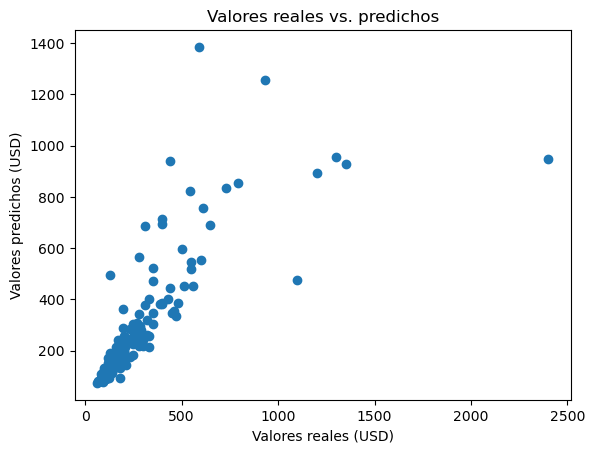

In [229]:
sns.reset_orig()  # Restablece los estilos de matplotlib/Seaborn a los predeterminados
plt.scatter(y_test, y_pred)
plt.title("Valores reales vs. predichos")
plt.xlabel("Valores reales (USD)")
plt.ylabel("Valores predichos (USD)")
plt.show()

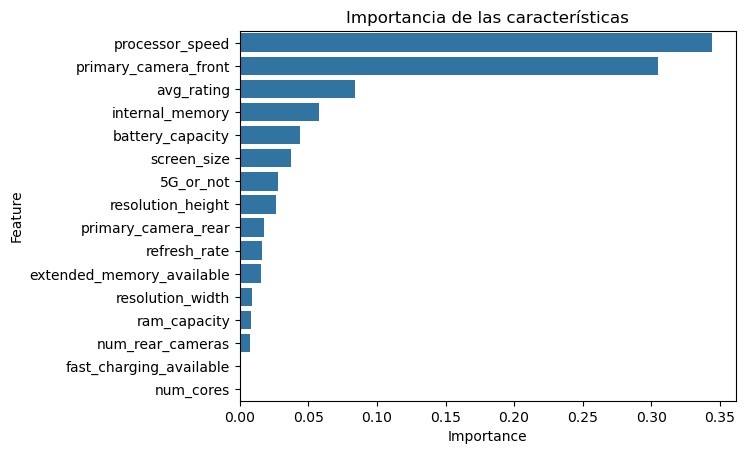

In [230]:
import pandas as pd
sns.reset_orig()  # Restablece los estilos de matplotlib/Seaborn a los predeterminados
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Importancia de las características")
plt.show()

Aplicación Modelo

In [231]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selección de características relevantes y la variable objetivo
features = ['avg_rating', '5G_or_not', 'processor_speed', 'battery_capacity', 'ram_capacity', 'screen_size']
X = smartphones_limpio_df[features]
y = smartphones_limpio_df['price_usd']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de datos numéricos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicción en el conjunto completo
smartphones_limpio_df['predicted_price_usd'] = model.predict(scaler.transform(X))

# Guardar DataFrame en Excel
output_file = "smartphones_predicted_prices.xlsx"
smartphones_limpio_df.to_excel(output_file, index=False)
print(f"Archivo guardado exitosamente como: {output_file}")

Archivo guardado exitosamente como: smartphones_predicted_prices.xlsx


## Aplicación Real del Modelo

In [232]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar archivo de prueba
archivo_prueba = "Datos_Prueba_Modelo_Real.xlsx"
datos_prueba = pd.read_excel(archivo_prueba)

# Seleccionar características relevantes del archivo de prueba
features = ['avg_rating', '5G_or_not', 'processor_speed', 'battery_capacity', 'ram_capacity', 'screen_size']
X_prueba = datos_prueba[features]

# Aplicar el escalador ya entrenado (normalización)
scaler = StandardScaler()
X_prueba_scaled = scaler.fit_transform(X_prueba)  # Asegúrate de usar el escalador preentrenado si es posible.

# Usar el modelo preentrenado para realizar las predicciones
predicted_prices = model.predict(X_prueba_scaled)

# Añadir columna de precios predichos al DataFrame
datos_prueba['predicted_price_usd'] = predicted_prices

# Guardar el nuevo DataFrame con las predicciones en un archivo Excel
output_file = "Datos_Predichos_Modelo_Real.xlsx"
datos_prueba.to_excel(output_file, index=False)
print(f"Archivo con predicciones guardado como: {output_file}")

Archivo con predicciones guardado como: Datos_Predichos_Modelo_Real.xlsx


## Modelo Actualizado Incluyendo Marcas

Actualización del modelo con datos categóricos

In [452]:
features = [
    'avg_rating', '5G_or_not', 'processor_speed',
    'fast_charging_available', 'ram_capacity', 'internal_memory', 
    'refresh_rate', 'num_rear_cameras', 'primary_camera_rear', 'primary_camera_front', 
    'extended_memory_available', 'resolution_height', 'resolution_width', 'brand_name','processor_brand',
]
X = smartphones_limpio_df[features]
y = smartphones_limpio_df['price_usd']

Preprocesamiento de variables categóricas Utiliza One Hot Encoder y las Normaliza utilizando StandarScaler

In [453]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identificar columnas categóricas y numéricas
# Ensure all columns exist in the dataframe
categorical_features = ['brand_name', 'processor_brand']
numerical_features = [
    'avg_rating', 'processor_speed', 'ram_capacity', 
    'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 
    'primary_camera_rear', 'primary_camera_front', 'resolution_height', 'resolution_width'
]

# Filter out columns that are not in the dataframe
categorical_features = [col for col in categorical_features if col in X.columns]
numerical_features = [col for col in numerical_features if col in X.columns]

# Crear transformador para procesar las columnas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Aplicar transformador a los datos
X_transformed = preprocessor.fit_transform(X)

División de Conjunto de Datos

In [454]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

Entrenamiento del Modelo con Random Forest

In [455]:
from sklearn.ensemble import RandomForestRegressor

# Definir y entrenar el modelo con un nuevo nombre
precio_modelo = RandomForestRegressor(random_state=42)
precio_modelo.fit(X_train, y_train)

# Predicciones
y_pred = precio_modelo.predict(X_test)

# Añadir predicciones al DataFrame
smartphones_limpio_df['predicted_price_usd'] = precio_modelo.predict(preprocessor.transform(X))

# Guardar en un archivo Excel
output_file = "Smartphones_Predicciones_Categoricas.xlsx"
smartphones_limpio_df.to_excel(output_file, index=False)
print(f"Archivo guardado como: {output_file}")

Archivo guardado como: Smartphones_Predicciones_Categoricas.xlsx


In [456]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Raíz cuadrada de MSE
mae = mean_absolute_error(y_test, y_pred)
mape = (abs(y_test - y_pred) / y_test).mean() * 100  # Error absoluto porcentual
r2 = r2_score(y_test, y_pred)

# Accuracy dentro de un rango de tolerancia (10%)
tolerance = 0.10
accuracy = sum(abs(y_test - y_pred) <= (tolerance * y_test)) / len(y_test) * 100

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del MSE (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Absoluto Porcentual Medio (MAPE): {mape:.2f}%")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Accuracy (dentro del {tolerance*100:.0f}% de tolerancia): {accuracy:.2f}%")


Error Cuadrático Medio (MSE): 37365.78
Raíz del MSE (RMSE): 193.30
Error Absoluto Medio (MAE): 76.66
Error Absoluto Porcentual Medio (MAPE): 22.99%
Coeficiente de Determinación (R²): 0.50
Accuracy (dentro del 10% de tolerancia): 38.04%


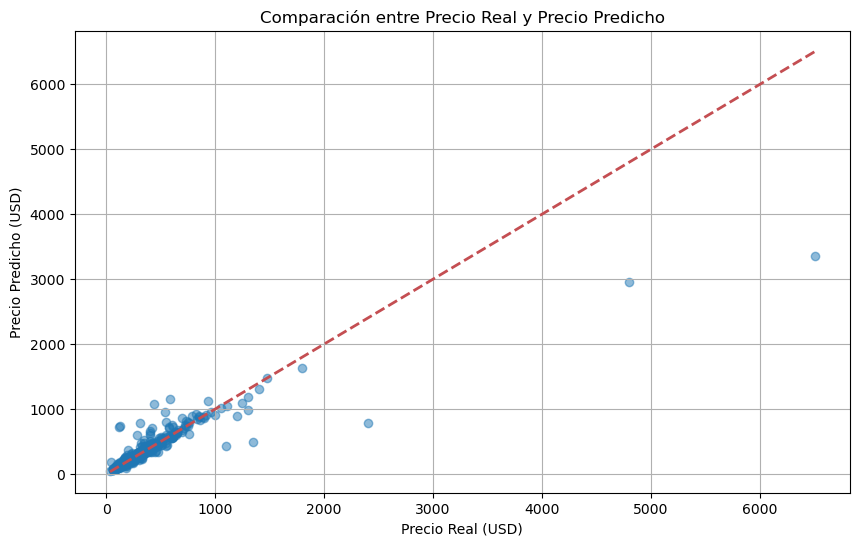

In [457]:
import matplotlib.pyplot as plt
sns.reset_orig()  # Restablece los estilos de matplotlib/Seaborn a los predeterminados

# Crear el gráfico de comparación
plt.figure(figsize=(10, 6))
plt.scatter(smartphones_limpio_df['price_usd'], smartphones_limpio_df['predicted_price_usd'], alpha=0.5)
plt.plot([smartphones_limpio_df['price_usd'].min(), smartphones_limpio_df['price_usd'].max()],
         [smartphones_limpio_df['price_usd'].min(), smartphones_limpio_df['price_usd'].max()], 
         'r--', lw=2)  # Línea de referencia (y=x)

plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.title('Comparación entre Precio Real y Precio Predicho')
plt.grid(True)
plt.show()

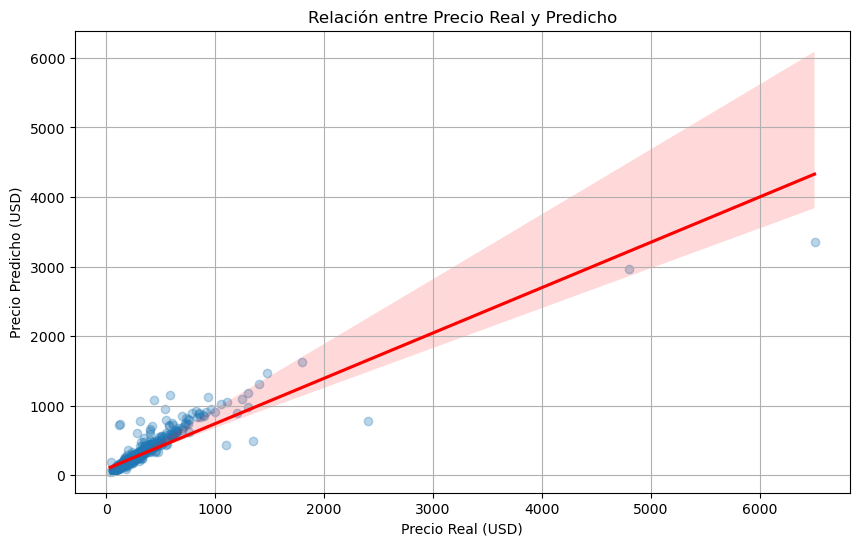

In [458]:
import seaborn as sns
sns.reset_orig()  # Restablece los estilos de matplotlib/Seaborn a los predeterminados

plt.figure(figsize=(10, 6))
sns.regplot(x='price_usd', y='predicted_price_usd', data=smartphones_limpio_df, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación entre Precio Real y Predicho')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.show()

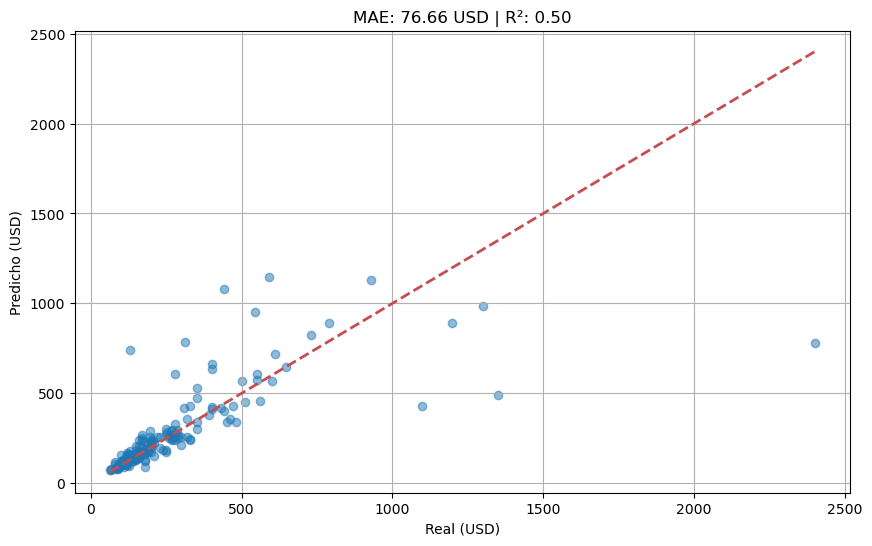

In [459]:
from sklearn.metrics import mean_absolute_error, r2_score
sns.reset_orig()  # Restablece los estilos de matplotlib/Seaborn a los predeterminados
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'MAE: {mae:.2f} USD | R²: {r2:.2f}')
plt.xlabel('Real (USD)')
plt.ylabel('Predicho (USD)')
plt.grid(True)
plt.show()

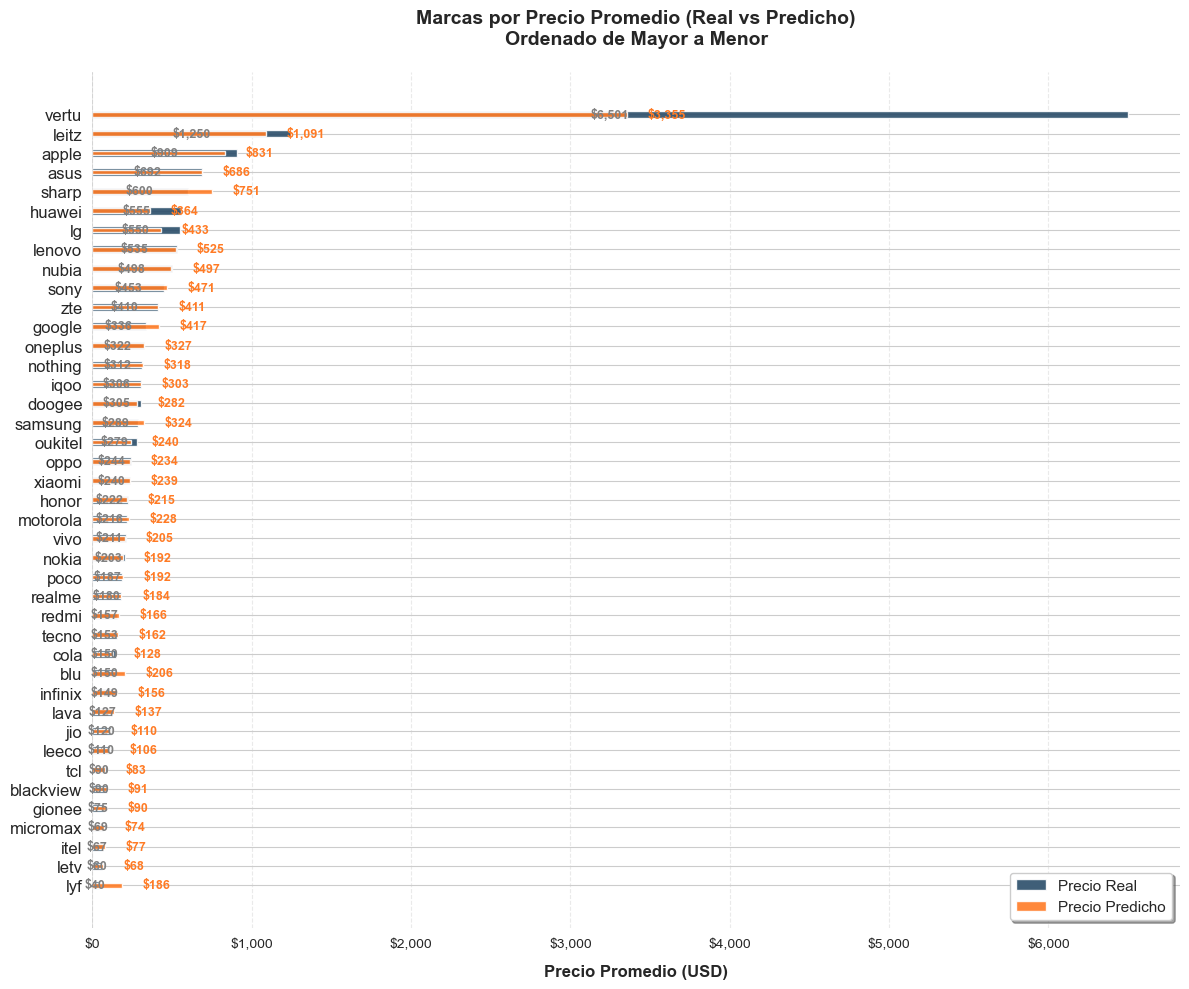

In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración de estilo ejecutivo mejorada
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11

# Cargar el archivo Excel
archivo = "Smartphones_Predicciones_Categoricas.xlsx"
df = pd.read_excel(archivo)

# Agrupar por marca y calcular el precio promedio
df_grouped = df.groupby('brand_name')[['price_usd', 'predicted_price_usd']].mean().reset_index()

# Ordenar por precio promedio real de forma DESCENDENTE (mayor a menor) y seleccionar el top 20
df_top20 = df_grouped.sort_values('price_usd', ascending=False)#.head(20)

# Crear figura con tamaño optimizado
fig, ax = plt.subplots(figsize=(12, 10))

# Configurar colores modernos
color_real = '#2a4d69'
color_pred = '#ff7b25'

# Barras horizontales con mejor separación y diseño
bar_height = 0.4
y_pos = np.arange(len(df_top20))

# Función para formatear los valores en dólares
def usd_formatter(x, pos):
    return f"${x:,.0f}"

# Crear las barras (INVERTIDAS con [::-1] para mostrar de mayor a menor)
real_bars = ax.barh(y_pos, df_top20['price_usd'], height=bar_height, 
                    color=color_real, label='Precio Real', alpha=0.9, edgecolor='white')
pred_bars = ax.barh(y_pos, df_top20['predicted_price_usd'], height=bar_height*0.6, 
                    color=color_pred, label='Precio Predicho', alpha=0.9, edgecolor='white')

# Añadir valores dentro de las barras para mejor legibilidad
for i, (real, pred) in enumerate(zip(df_top20['price_usd'], df_top20['predicted_price_usd'])):
    # Valores para barras reales (color blanco para contraste)
    ax.text(real * 0.5, i, f"${real:,.0f}", 
            va='center', ha='center', color='gray', fontsize=9, fontweight='bold')
    
    # Valores para barras predichas (colocadas al final)
    ax.text(pred + (0.02 * df_top20['price_usd'].max()), i, f"${pred:,.0f}", 
            va='center', ha='left', color=color_pred, fontsize=9, fontweight='bold')

# Ajustes estéticos mejorados
ax.set_yticks(y_pos)
ax.set_yticklabels(df_top20['brand_name'], fontsize=12)
ax.set_xlabel('Precio Promedio (USD)', fontweight='bold', labelpad=10)
ax.set_title('Marcas por Precio Promedio (Real vs Predicho)\nOrdenado de Mayor a Menor', 
             pad=20, fontweight='bold', fontsize=14)

# Invertir el eje Y para mostrar el más caro arriba
ax.invert_yaxis()

# Formatear eje X con separadores de miles
ax.xaxis.set_major_formatter(FuncFormatter(usd_formatter))

# Leyenda mejor posicionada y diseñada
ax.legend(loc='lower right', frameon=True, shadow=True, 
          bbox_to_anchor=(1, 0), framealpha=1)

# Gridlines mejorados
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Eliminar bordes no necesarios
sns.despine(left=True, bottom=True)

# Añadir línea vertical en cero para referencia
ax.axvline(x=0, color='gray', alpha=0.2, linestyle='-')

# Ajustar márgenes automáticamente
plt.tight_layout()

# Guardar imagen con alta calidad y fondo transparente
plt.savefig('comparativa_precios_marcas_descendente.png', 
            dpi=300, bbox_inches='tight', transparent=False)
plt.show()

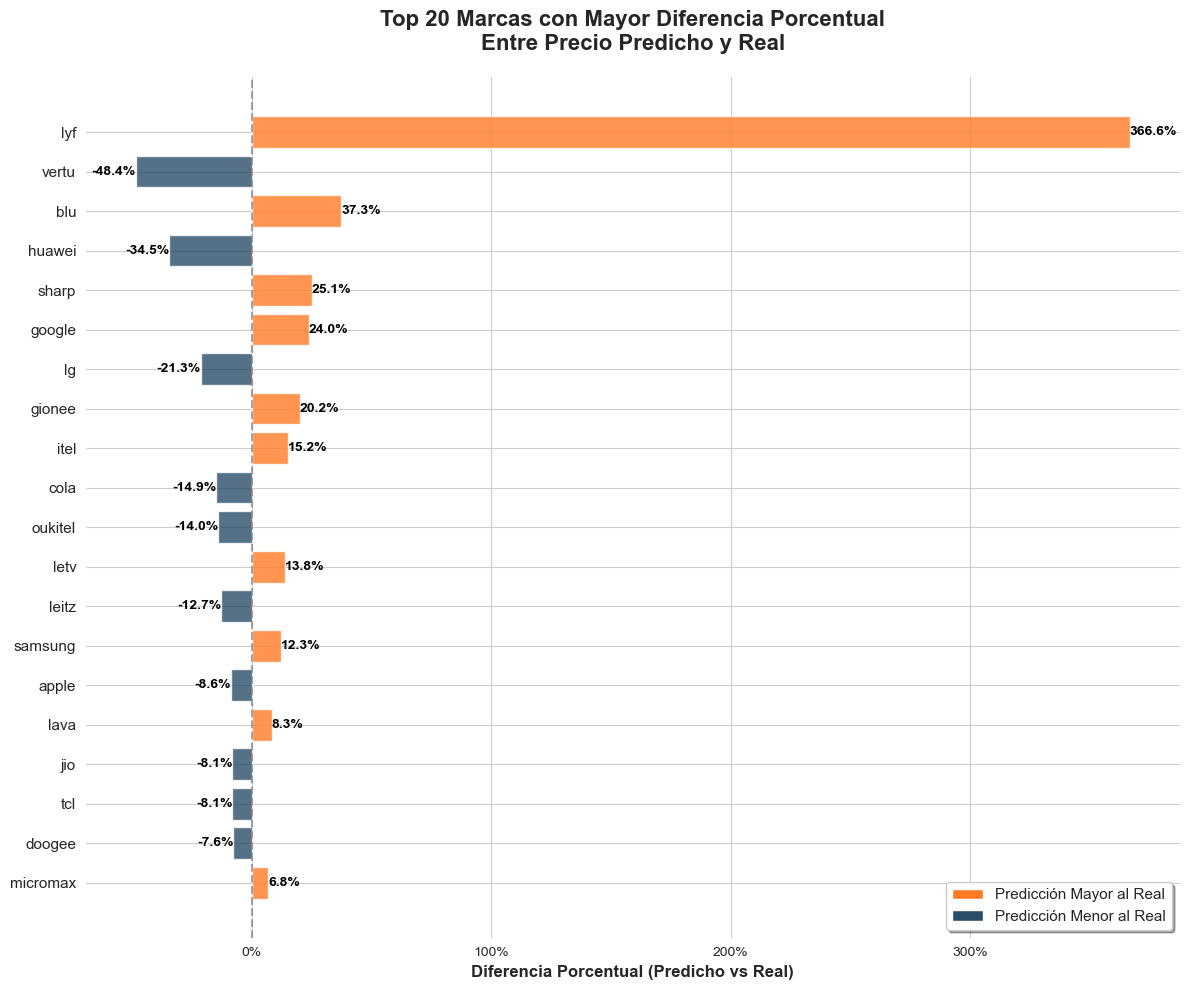

In [461]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter, PercentFormatter

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 11

# Cargar datos
df = pd.read_excel("Smartphones_Predicciones_Categoricas.xlsx")

# Calcular promedios y diferencia porcentual
df_grouped = df.groupby('brand_name')[['price_usd', 'predicted_price_usd']].mean().reset_index()
df_grouped['diferencia_porcentual'] = ((df_grouped['predicted_price_usd'] - df_grouped['price_usd']) / df_grouped['price_usd']) * 100

# Ordenar por valor absoluto de diferencia y tomar top 20
df_top20 = df_grouped.reindex(df_grouped['diferencia_porcentual'].abs().sort_values(ascending=False).index).head(20)

# Crear figura
plt.figure(figsize=(12, 10))

# Colores según si la predicción fue mayor o menor
colors = np.where(df_top20['diferencia_porcentual'] > 0, '#ff7b25', '#2a4d69')

# Gráfico de barras horizontales
bars = plt.barh(df_top20['brand_name'], df_top20['diferencia_porcentual'], color=colors, alpha=0.8, edgecolor='white')

# Añadir línea en cero
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for bar in bars:
    width = bar.get_width()
    label_x = width if width > 0 else width
    va = 'center'
    color = 'black' if abs(width) < 5 else 'white'
    plt.text(label_x, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', 
             va=va, ha='left' if width > 0 else 'right',
             color=color, fontsize=9, fontweight='bold')

# Formatear eje X como porcentaje
plt.gca().xaxis.set_major_formatter(PercentFormatter())

# Ajustes estéticos
plt.xlabel('Diferencia Porcentual (Predicho vs Real)', fontweight='bold')
plt.title('Top 20 Marcas con Mayor Diferencia Porcentual\nEntre Precio Predicho y Real', 
          pad=20, fontweight='bold')
plt.gca().invert_yaxis()  # Marcas con mayor diferencia arriba

# Leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#ff7b25', label='Predicción Mayor al Real'),
                   Patch(facecolor='#2a4d69', label='Predicción Menor al Real')]
plt.legend(handles=legend_elements, loc='lower right', frameon=True, shadow=True)

sns.despine(left=True, bottom=True)
plt.tight_layout()

# Añadir etiquetas de valor con el símbolo de porcentaje
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%',  # Incluye el símbolo %
             va='center', ha='left' if width > 0 else 'right',
             color='black', fontsize=10, fontweight='bold')
# Guardar y mostrar
plt.savefig('diferencias_porcentuales_predicciones.png', dpi=300, bbox_inches='tight')
plt.show()

Evaluación Modelo

In [463]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 37365.78
Error absoluto medio (MAE): 76.66
Coeficiente de determinación (R²): 0.50


## Aplicación Real Nuevo Modelo

In [464]:
import pandas as pd

# Cargar el archivo Excel de prueba
datos_prueba = pd.read_excel('Datos_Prueba_Modelo_Real.xlsx')

# Validar las columnas en el archivo de prueba
features = [
    'avg_rating', '5G_or_not', 'processor_speed',
    'fast_charging_available', 'ram_capacity', 'internal_memory',
    'refresh_rate', 'num_rear_cameras', 'primary_camera_rear', 'primary_camera_front',
    'extended_memory_available', 'resolution_height', 'resolution_width', 'brand_name', 'processor_brand'
]

# Filtrar características que existen en el DataFrame
features = [col for col in features if col in datos_prueba.columns]

# Verificar si faltan columnas necesarias para el preprocesador
missing_columns = set(preprocessor.get_feature_names_out()) - set(features)
if missing_columns:
    print(f"Advertencia: Las siguientes columnas están ausentes y serán ignoradas: {missing_columns}")

# Transformar los datos utilizando el preprocesador
datos_transformados = preprocessor.transform(datos_prueba[features])

# Realizar predicciones
datos_prueba['predicted_price_usd'] = precio_modelo.predict(datos_transformados)

# Guardar el resultado en un archivo Excel nuevo
datos_prueba.to_excel('Datos_Prueba_Modelo_Real_Predicho_1.xlsx', index=False)

Advertencia: Las siguientes columnas están ausentes y serán ignoradas: {'cat__brand_name_micromax', 'cat__brand_name_lg', 'cat__brand_name_xiaomi', 'num__internal_memory', 'cat__brand_name_asus', 'cat__brand_name_iqoo', 'cat__brand_name_tecno', 'cat__processor_brand_unisoc', 'num__ram_capacity', 'cat__processor_brand_tiger', 'cat__brand_name_zte', 'cat__brand_name_leeco', 'cat__brand_name_lava', 'cat__brand_name_lyf', 'cat__brand_name_realme', 'cat__processor_brand_bionic', 'cat__brand_name_lenovo', 'cat__processor_brand_kirin', 'cat__brand_name_sony', 'cat__brand_name_apple', 'cat__brand_name_poco', 'cat__processor_brand_helio', 'cat__brand_name_gionee', 'cat__brand_name_google', 'num__num_rear_cameras', 'cat__brand_name_leitz', 'cat__brand_name_doogee', 'cat__brand_name_vivo', 'cat__processor_brand_exynos', 'num__primary_camera_rear', 'cat__brand_name_nubia', 'cat__brand_name_blackview', 'cat__brand_name_samsung', 'cat__brand_name_sharp', 'cat__brand_name_redmi', 'cat__brand_name_ver

Graficó Apliación Modelo Datos Reales

Columnas disponibles en datos_prueba: ['brand_name', 'model', 'avg_rating', '5G_or_not', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'resolution_height', 'resolution_width', 'predicted_price_usd']


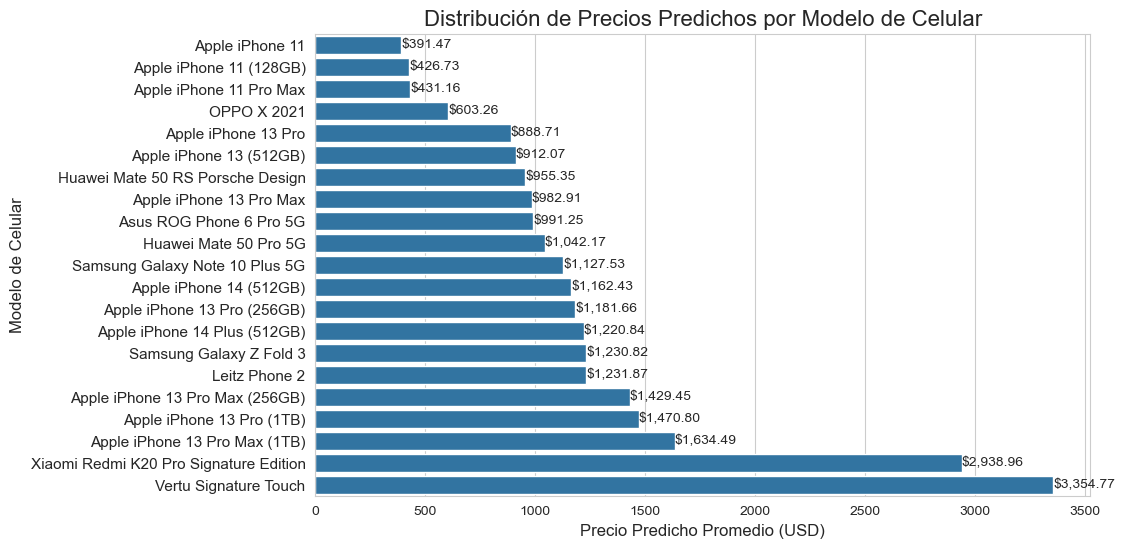

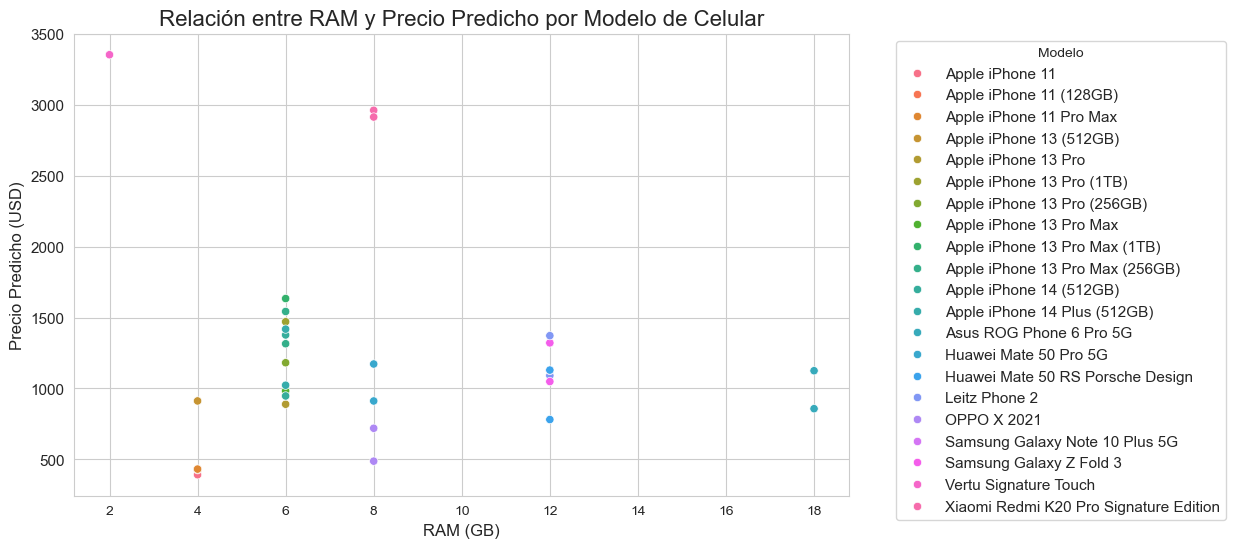

C:\Users\Dc\AppData\Local\Temp\ipykernel_16620\1394635759.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



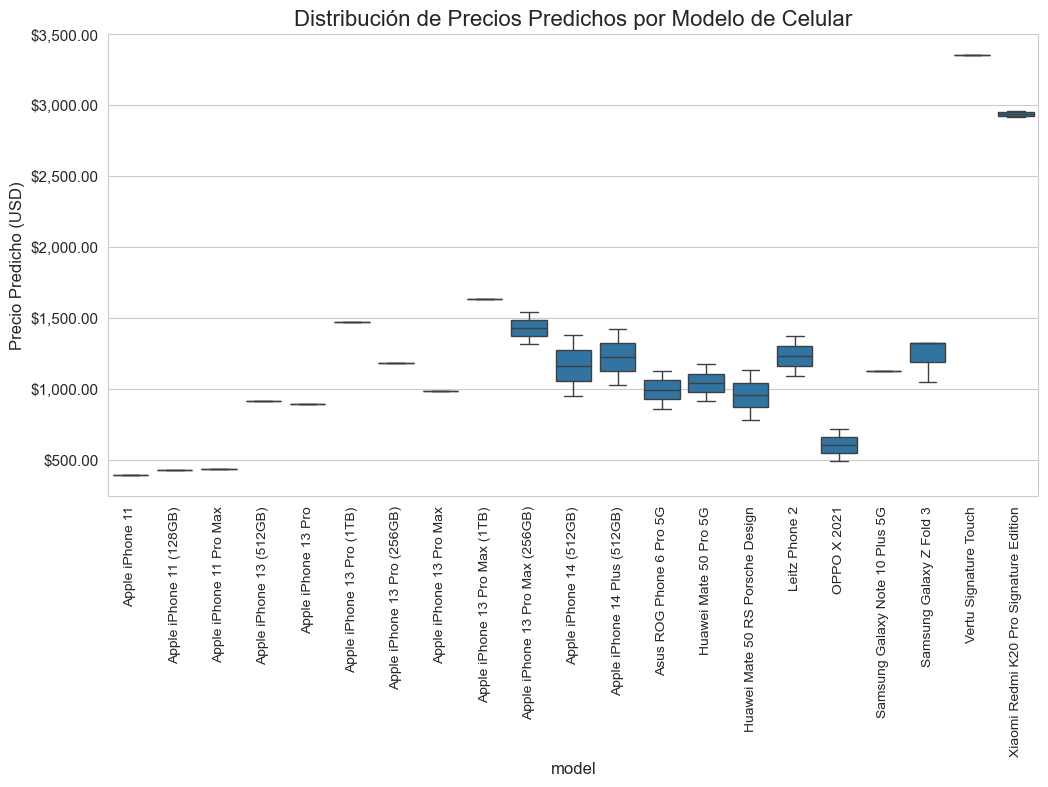

In [467]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo con precios predichos
datos_prueba = pd.read_excel('Datos_Prueba_Modelo_Real_Predicho_1.xlsx')

# Verificar las columnas disponibles en el DataFrame
print("Columnas disponibles en datos_prueba:", datos_prueba.columns.tolist())

# Gráfico de barras: Precio predicho promedio por modelo de celular
precio_por_modelo = datos_prueba.groupby('model')['predicted_price_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=precio_por_modelo.values, y=precio_por_modelo.index)
plt.xlabel('Precio Predicho Promedio (USD)')
plt.ylabel('Modelo de Celular')
plt.title('Distribución de Precios Predichos por Modelo de Celular')

# Agregar valores en dólares al final de las barras
for index, value in enumerate(precio_por_modelo.values):
    plt.text(value, index, f"${value:,.2f}", va='center', fontsize=10)

plt.show()

# Gráfico de dispersión: Relación entre modelo y características técnicas
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos_prueba['ram_capacity'], y=datos_prueba['predicted_price_usd'], hue=datos_prueba['model'])
plt.xlabel('RAM (GB)')
plt.ylabel('Precio Predicho (USD)')
plt.title('Relación entre RAM y Precio Predicho por Modelo de Celular')
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico de caja: Distribución de precios por modelo de celular
plt.figure(figsize=(12, 6))
sns.boxplot(x=datos_prueba['model'], y=datos_prueba['predicted_price_usd'])
plt.xticks(rotation=90)
plt.ylabel('Precio Predicho (USD)')
plt.title('Distribución de Precios Predichos por Modelo de Celular')

# Agregar valores en dólares al final de las cajas
plt.gca().set_yticklabels([f"${tick:,.2f}" for tick in plt.gca().get_yticks()])

plt.show()

✓ Datos cargados: 33 registros
✓ Predicciones generadas


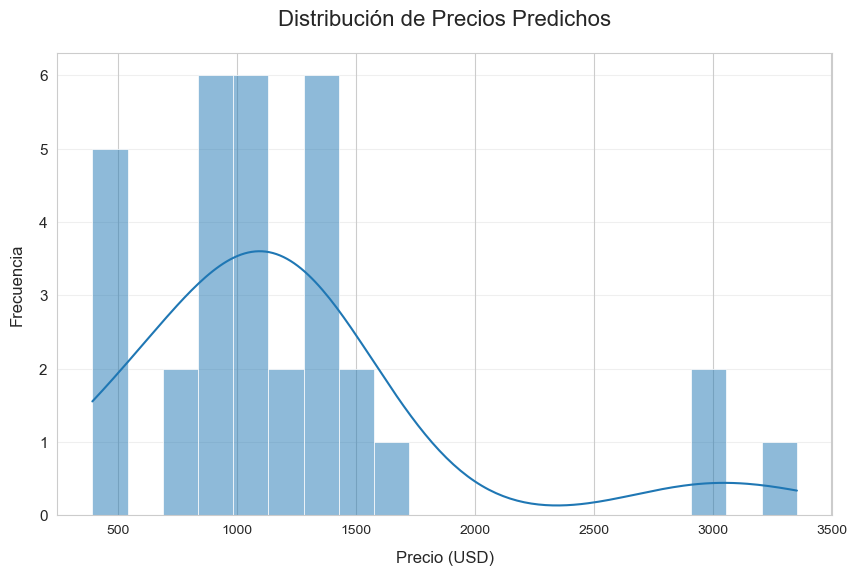

C:\Users\Dc\AppData\Local\Temp\ipykernel_16620\1378576063.py:77: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




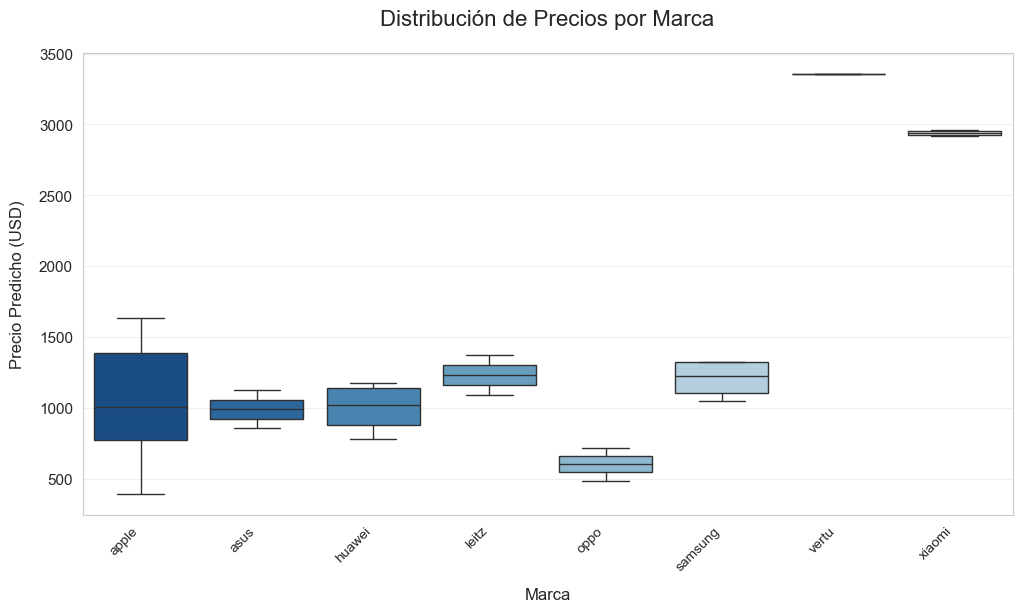

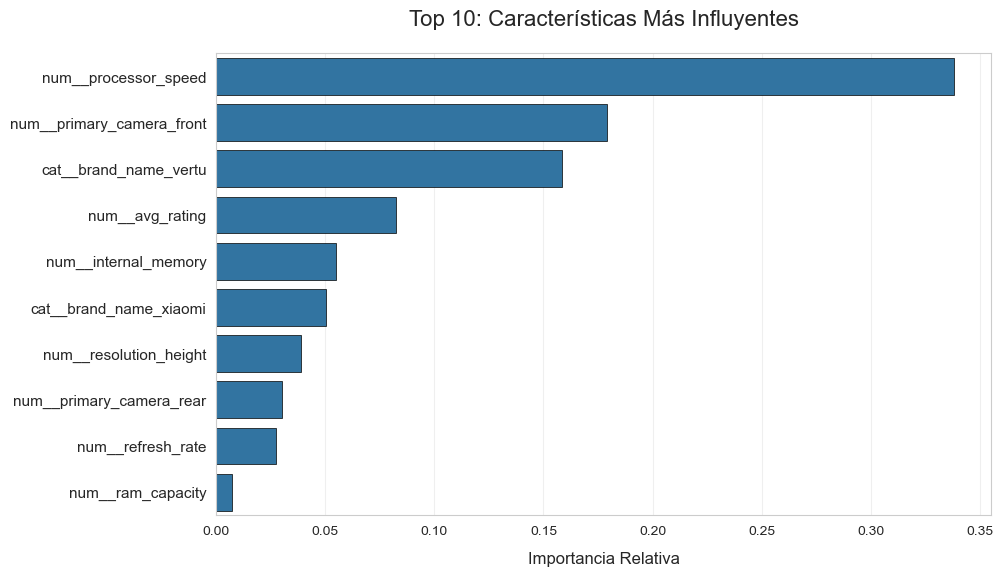

✓ Resultados guardados en: Datos_Prueba_Modelo_Real_Predicho.xlsx


In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo y colores
ESTILO_GRAFICOS = {
    'paleta_principal': 'Blues_r',  # Paleta azul (invertida para tonos más oscuros)
    'color_histograma': '#1f77b4',   # Azul estándar
    'color_boxplot': '#2ca02c',      # Verde
    'color_importancias': '#1f77b4', # Azul estándar
    'estilo_fondo': 'whitegrid'
}

def aplicar_modelo_con_graficos(archivo_entrada, archivo_salida):
    """
    Aplica el modelo y genera gráficos con colores personalizados
    
    Args:
        archivo_entrada: Ruta del archivo Excel de entrada
        archivo_salida: Ruta del archivo Excel de salida con predicciones
    """
    # Configurar estilo
    sns.set_style(ESTILO_GRAFICOS['estilo_fondo'])
    plt.rcParams['figure.facecolor'] = 'white'
    
    # 1. Cargar datos
    try:
        datos = pd.read_excel(archivo_entrada)
        print(f"✓ Datos cargados: {len(datos)} registros")
    except Exception as e:
        print(f"✗ Error al cargar archivo: {str(e)}")
        return None

    # 2. Validar características
    features = [
        'avg_rating', '5G_or_not', 'processor_speed', 'fast_charging_available',
        'ram_capacity', 'internal_memory', 'refresh_rate', 'num_rear_cameras',
        'primary_camera_rear', 'primary_camera_front', 'extended_memory_available',
        'resolution_height', 'resolution_width', 'brand_name','processor_brand'
    ]
    features = [f for f in features if f in datos.columns]
    
    # 3. Generar predicciones
    try:
        datos_transformados = preprocessor.transform(datos[features])
        datos['predicted_price_usd'] = precio_modelo.predict(datos_transformados)
        print("✓ Predicciones generadas")
    except Exception as e:
        print(f"✗ Error en predicción: {str(e)}")
        return None
    
    # ----------------------------------
    # Visualizaciones con nuevos colores
    # ----------------------------------
    
    # A. Distribución de precios predichos
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=datos, 
        x='predicted_price_usd', 
        color=ESTILO_GRAFICOS['color_histograma'],
        bins=20, 
        kde=True,
        edgecolor='white',
        linewidth=0.5
    )
    plt.title('Distribución de Precios Predichos', pad=20)
    plt.xlabel('Precio (USD)', labelpad=10)
    plt.ylabel('Frecuencia', labelpad=10)
    plt.grid(axis='y', alpha=0.3)
    plt.savefig('distribucion_precios.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # B. Boxplot por marca (si existe)
    if 'brand_name' in datos.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            data=datos,
            x='brand_name',
            y='predicted_price_usd',
            palette=ESTILO_GRAFICOS['paleta_principal'],
            showfliers=False,
            linewidth=1
        )
        plt.title('Distribución de Precios por Marca', pad=20)
        plt.xlabel('Marca', labelpad=10)
        plt.ylabel('Precio Predicho (USD)', labelpad=10)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        plt.savefig('precios_por_marca.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # C. Importancia de características (si disponible)
    if hasattr(precio_modelo, 'feature_importances_'):
        importancias = precio_modelo.feature_importances_
        features_df = pd.DataFrame({
            'Característica': preprocessor.get_feature_names_out(),
            'Importancia': importancias
        }).sort_values('Importancia', ascending=False).head(10)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=features_df,
            x='Importancia',
            y='Característica',
            color=ESTILO_GRAFICOS['color_importancias'],
            edgecolor='black',
            linewidth=0.5
        )
        plt.title('Top 10: Características Más Influyentes', pad=20)
        plt.xlabel('Importancia Relativa', labelpad=10)
        plt.ylabel('')
        plt.grid(axis='x', alpha=0.3)
        plt.savefig('importancia_caracteristicas.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # 4. Guardar resultados
    try:
        datos.to_excel(archivo_salida, index=False)
        print(f"✓ Resultados guardados en: {archivo_salida}")
        return datos
    except Exception as e:
        print(f"✗ Error al guardar: {str(e)}")
        return None

# Ejecutar la función
resultados = aplicar_modelo_con_graficos(
    archivo_entrada='Datos_Prueba_Modelo_Real.xlsx',
    archivo_salida='Datos_Prueba_Modelo_Real_Predicho.xlsx'
)

## Ajuste Modelo

In [418]:
features1 = [
    'avg_rating', 'processor_speed',
    'fast_charging_available', 'ram_capacity', 'internal_memory',
    'refresh_rate','brand_name',
]
X = smartphones_limpio_df[features1]
y = smartphones_limpio_df['price_usd']

In [419]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Filtrar columnas existentes en el DataFrame
categorical_features1 = ['brand_name']
numerical_features1 = [
    'avg_rating', 'processor_speed', 'fast_charging_available', 
    'ram_capacity', 'internal_memory', 'refresh_rate'
]
features1 = [col for col in categorical_features1 + numerical_features1 if col in smartphones_limpio_df.columns]

X = smartphones_limpio_df[features1]
y = smartphones_limpio_df['price_usd']

# Crear transformador con mejoras en OneHotEncoder
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features1),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features1)
])

# Aplicar transformaciones
X_transformed = preprocessor.fit_transform(X)

In [420]:
from sklearn.preprocessing import StandardScaler

# Set with_mean=False to handle sparse matrices
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [421]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=42)

In [422]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo base
modelo = RandomForestRegressor(random_state=42)

# Definir el grid de búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Ejecutar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extraer el mejor modelo encontrado
best_model = grid_search.best_estimator_
print("Mejor combinación de hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo optimizado con los mejores hiperparámetros
precio_modelo_ajustado = best_model
precio_modelo_ajustado.fit(X_train, y_train)

# Realizar predicciones
y_pred = precio_modelo_ajustado.predict(X_test)

# Añadir predicciones al DataFrame
smartphones_limpio_df['predicted_price_usd'] = precio_modelo_ajustado.predict(preprocessor.transform(X))

# Guardar en un archivo Excel
output_file = "Smartphones_Predicciones_Categoricas_Ajuste_Variables.xlsx"
smartphones_limpio_df.to_excel(output_file, index=False)
print(f"Archivo guardado como: {output_file}")

Mejor combinación de hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Archivo guardado como: Smartphones_Predicciones_Categoricas_Ajuste_Variables.xlsx


In [423]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Raíz cuadrada de MSE
mae = mean_absolute_error(y_test, y_pred)
mape = (abs(y_test - y_pred) / y_test).mean() * 100  # Error absoluto porcentual
r2 = r2_score(y_test, y_pred)

# Accuracy dentro de un rango de tolerancia (10%)
tolerance = 0.10
accuracy = sum(abs(y_test - y_pred) <= (tolerance * y_test)) / len(y_test) * 100

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del MSE (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Absoluto Porcentual Medio (MAPE): {mape:.2f}%")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Accuracy (dentro del {tolerance*100:.0f}% de tolerancia): {accuracy:.2f}%")

Error Cuadrático Medio (MSE): 46149.55
Raíz del MSE (RMSE): 214.82
Error Absoluto Medio (MAE): 75.33
Error Absoluto Porcentual Medio (MAPE): 21.88%
Coeficiente de Determinación (R²): 0.38
Accuracy (dentro del 10% de tolerancia): 39.26%


Grafíco Modelo

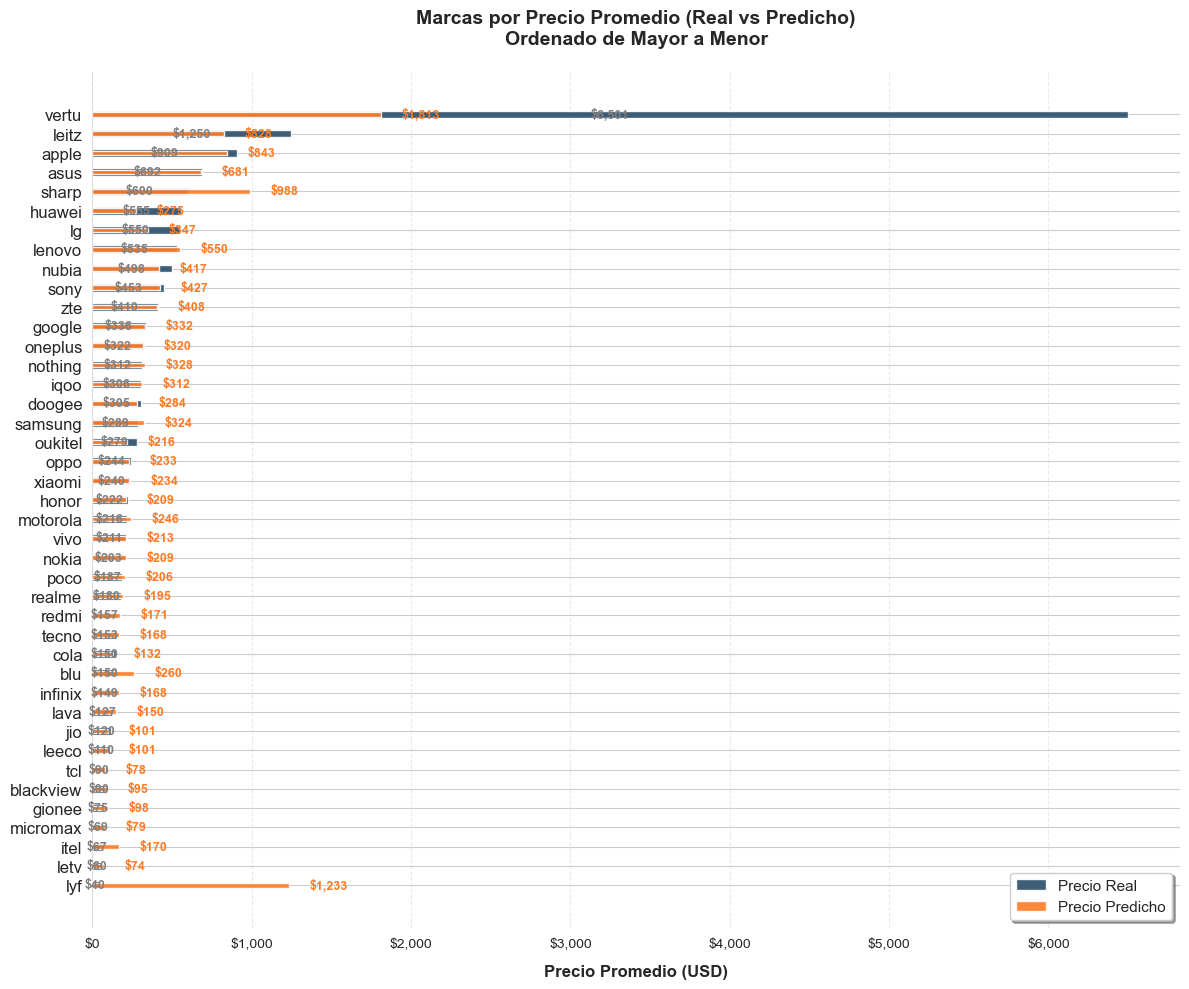

In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración de estilo ejecutivo mejorada
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11

# Cargar el archivo Excel
archivo = "Smartphones_Predicciones_Categoricas_Ajuste_Variables.xlsx"
df = pd.read_excel(archivo)

# Agrupar por marca y calcular el precio promedio
df_grouped = df.groupby('brand_name')[['price_usd', 'predicted_price_usd']].mean().reset_index()

# Ordenar por precio promedio real de forma DESCENDENTE (mayor a menor) y seleccionar el top 20
df_top20 = df_grouped.sort_values('price_usd', ascending=False)#.head(20)

# Crear figura con tamaño optimizado
fig, ax = plt.subplots(figsize=(12, 10))

# Configurar colores modernos
color_real = '#2a4d69'
color_pred = '#ff7b25'

# Barras horizontales con mejor separación y diseño
bar_height = 0.4
y_pos = np.arange(len(df_top20))

# Función para formatear los valores en dólares
def usd_formatter(x, pos):
    return f"${x:,.0f}"

# Crear las barras (INVERTIDAS con [::-1] para mostrar de mayor a menor)
real_bars = ax.barh(y_pos, df_top20['price_usd'], height=bar_height, 
                    color=color_real, label='Precio Real', alpha=0.9, edgecolor='white')
pred_bars = ax.barh(y_pos, df_top20['predicted_price_usd'], height=bar_height*0.6, 
                    color=color_pred, label='Precio Predicho', alpha=0.9, edgecolor='white')

# Añadir valores dentro de las barras para mejor legibilidad
for i, (real, pred) in enumerate(zip(df_top20['price_usd'], df_top20['predicted_price_usd'])):
    # Valores para barras reales (color blanco para contraste)
    ax.text(real * 0.5, i, f"${real:,.0f}", 
            va='center', ha='center', color='gray', fontsize=9, fontweight='bold')
    
    # Valores para barras predichas (colocadas al final)
    ax.text(pred + (0.02 * df_top20['price_usd'].max()), i, f"${pred:,.0f}", 
            va='center', ha='left', color=color_pred, fontsize=9, fontweight='bold')

# Ajustes estéticos mejorados
ax.set_yticks(y_pos)
ax.set_yticklabels(df_top20['brand_name'], fontsize=12)
ax.set_xlabel('Precio Promedio (USD)', fontweight='bold', labelpad=10)
ax.set_title('Marcas por Precio Promedio (Real vs Predicho)\nOrdenado de Mayor a Menor', 
             pad=20, fontweight='bold', fontsize=14)

# Invertir el eje Y para mostrar el más caro arriba
ax.invert_yaxis()

# Formatear eje X con separadores de miles
ax.xaxis.set_major_formatter(FuncFormatter(usd_formatter))

# Leyenda mejor posicionada y diseñada
ax.legend(loc='lower right', frameon=True, shadow=True, 
          bbox_to_anchor=(1, 0), framealpha=1)

# Gridlines mejorados
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Eliminar bordes no necesarios
sns.despine(left=True, bottom=True)

# Añadir línea vertical en cero para referencia
ax.axvline(x=0, color='gray', alpha=0.2, linestyle='-')

# Ajustar márgenes automáticamente
plt.tight_layout()

# Guardar imagen con alta calidad y fondo transparente
plt.savefig('comparativa_precios_marcas_descendente.png', 
            dpi=300, bbox_inches='tight', transparent=False)
plt.show()

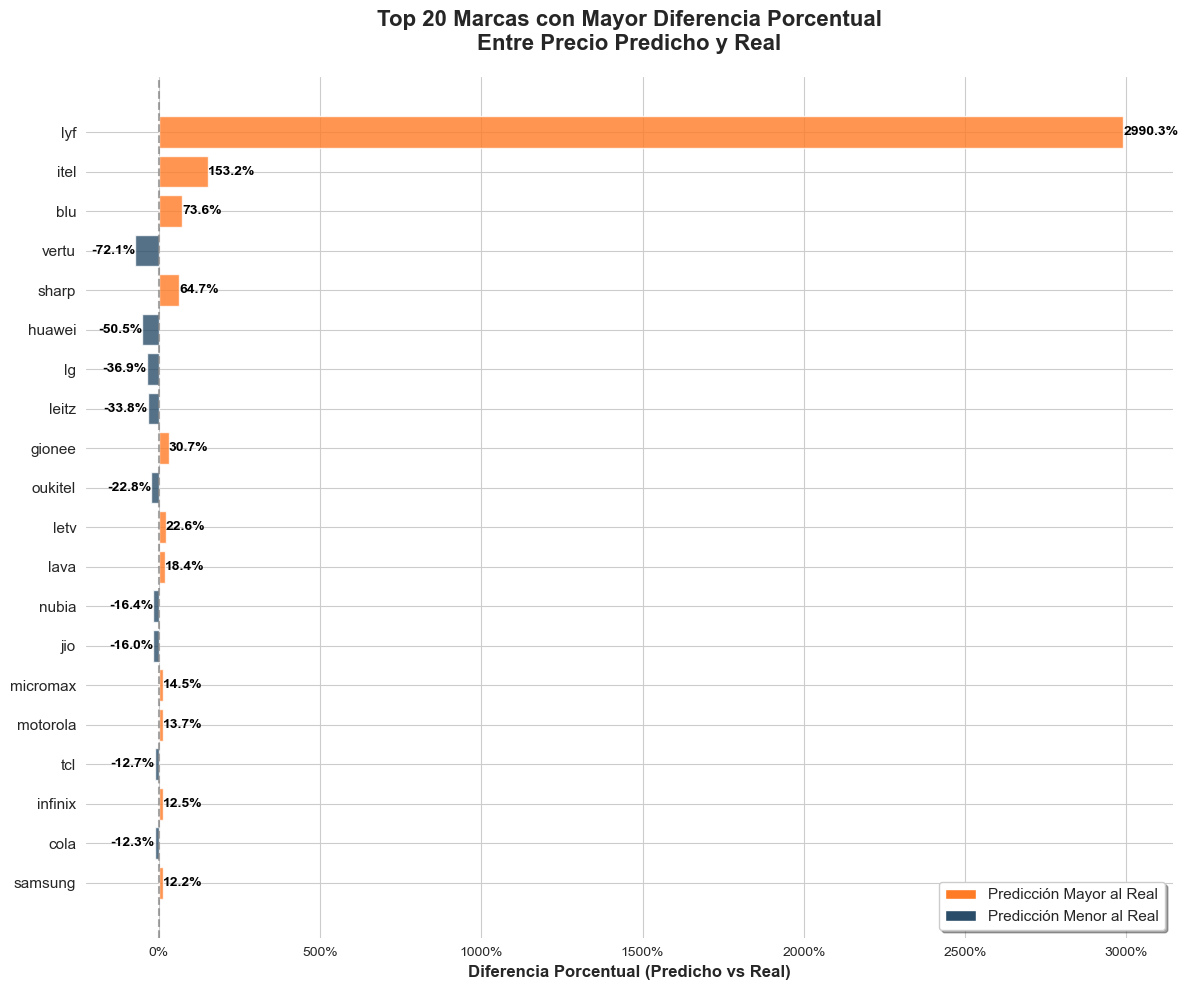

In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter, PercentFormatter

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 11

# Cargar datos
df = pd.read_excel("Smartphones_Predicciones_Categoricas_Ajuste_Variables.xlsx")

# Calcular promedios y diferencia porcentual
df_grouped = df.groupby('brand_name')[['price_usd', 'predicted_price_usd']].mean().reset_index()
df_grouped['diferencia_porcentual'] = ((df_grouped['predicted_price_usd'] - df_grouped['price_usd']) / df_grouped['price_usd']) * 100

# Ordenar por valor absoluto de diferencia y tomar top 20
df_top20 = df_grouped.reindex(df_grouped['diferencia_porcentual'].abs().sort_values(ascending=False).index).head(20)

# Crear figura
plt.figure(figsize=(12, 10))

# Colores según si la predicción fue mayor o menor
colors = np.where(df_top20['diferencia_porcentual'] > 0, '#ff7b25', '#2a4d69')

# Gráfico de barras horizontales
bars = plt.barh(df_top20['brand_name'], df_top20['diferencia_porcentual'], color=colors, alpha=0.8, edgecolor='white')

# Añadir línea en cero
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for bar in bars:
    width = bar.get_width()
    label_x = width if width > 0 else width
    va = 'center'
    color = 'black' if abs(width) < 5 else 'white'
    plt.text(label_x, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', 
             va=va, ha='left' if width > 0 else 'right',
             color=color, fontsize=9, fontweight='bold')

# Formatear eje X como porcentaje
plt.gca().xaxis.set_major_formatter(PercentFormatter())

# Ajustes estéticos
plt.xlabel('Diferencia Porcentual (Predicho vs Real)', fontweight='bold')
plt.title('Top 20 Marcas con Mayor Diferencia Porcentual\nEntre Precio Predicho y Real', 
          pad=20, fontweight='bold')
plt.gca().invert_yaxis()  # Marcas con mayor diferencia arriba

# Leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#ff7b25', label='Predicción Mayor al Real'),
                   Patch(facecolor='#2a4d69', label='Predicción Menor al Real')]
plt.legend(handles=legend_elements, loc='lower right', frameon=True, shadow=True)

sns.despine(left=True, bottom=True)
plt.tight_layout()

# Añadir etiquetas de valor con el símbolo de porcentaje
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%',  # Incluye el símbolo %
             va='center', ha='left' if width > 0 else 'right',
             color='black', fontsize=10, fontweight='bold')
# Guardar y mostrar
plt.savefig('diferencias_porcentuales_predicciones.png', dpi=300, bbox_inches='tight')
plt.show()

### Ejecución Real nuevo Modelo Ajustado 2

In [444]:
import pandas as pd

# Cargar el archivo Excel de prueba
datos_prueba = pd.read_excel('Datos_Prueba_Modelo_Real.xlsx')

# Validar las columnas en el archivo de prueba
features = [
    'avg_rating', 'processor_speed',
    'fast_charging_available', 'ram_capacity', 'internal_memory',
    'refresh_rate', 'brand_name', 'processor_brand'
]

# Filtrar características que existen en el DataFrame
features = [col for col in features if col in datos_prueba.columns]

# Transformar los datos utilizando el preprocesador
datos_transformados = preprocessor.transform(datos_prueba[features])

# Realizar predicciones
datos_prueba['predicted_price_usd'] = precio_modelo_ajustado.predict(datos_transformados)

# Guardar el resultado en un archivo Excel nuevo
datos_prueba.to_excel('Datos_Prueba_Modelo_Real_Predicho.xlsx', index=False)

Columnas disponibles en datos_prueba: ['brand_name', 'model', 'avg_rating', '5G_or_not', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'resolution_height', 'resolution_width', 'predicted_price_usd']


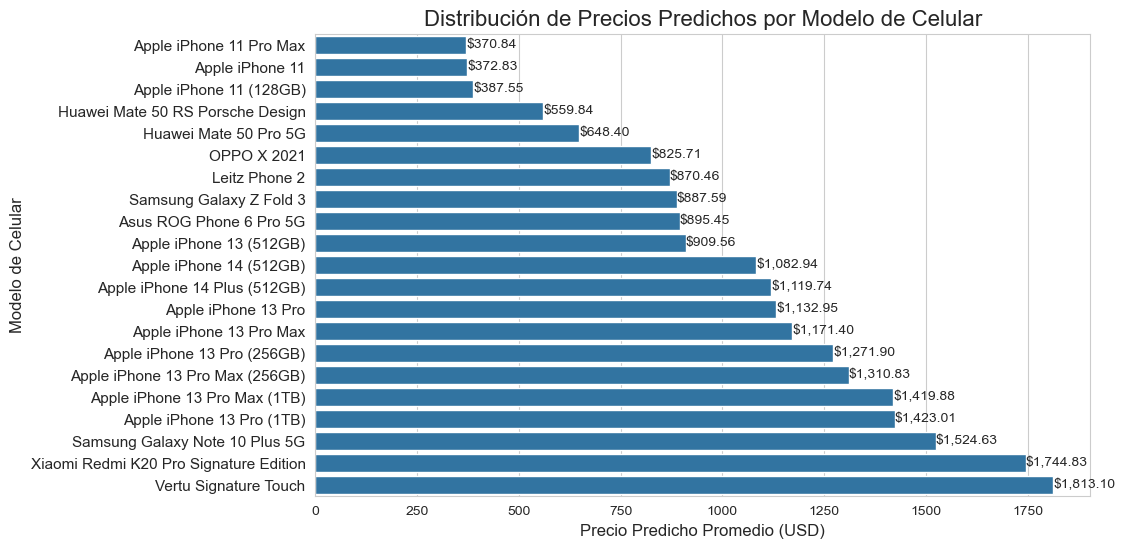

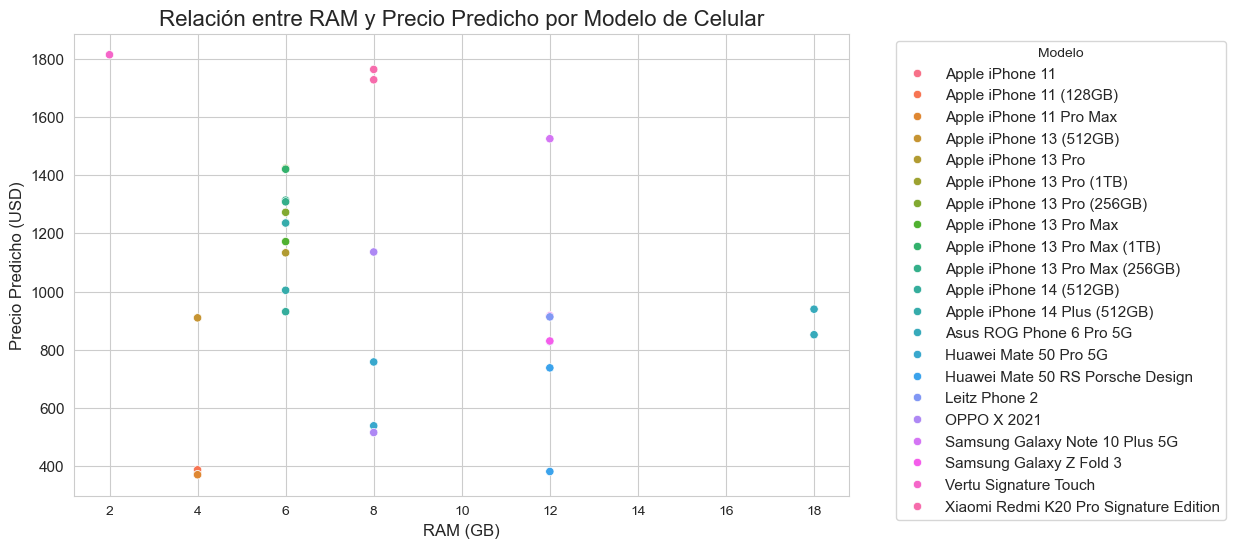

C:\Users\Dc\AppData\Local\Temp\ipykernel_16620\951709316.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



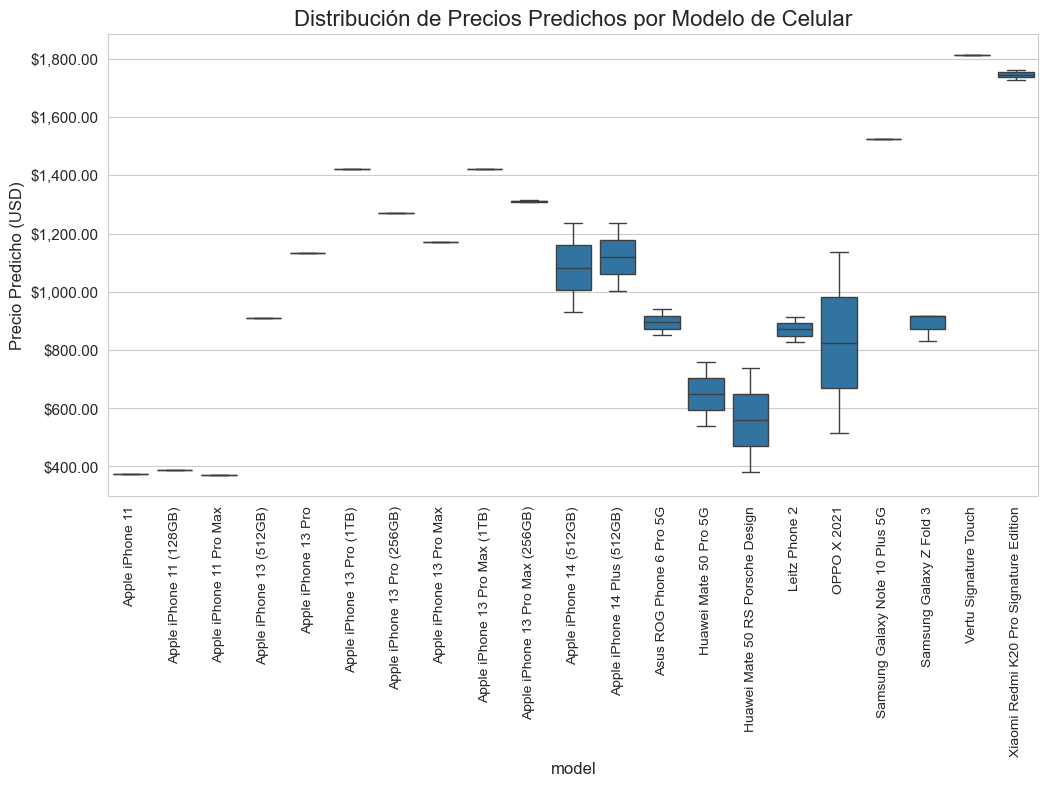

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo con precios predichos
datos_prueba = pd.read_excel('Datos_Prueba_Modelo_Real_Predicho.xlsx')

# Verificar las columnas disponibles en el DataFrame
print("Columnas disponibles en datos_prueba:", datos_prueba.columns.tolist())

# Gráfico de barras: Precio predicho promedio por modelo de celular
precio_por_modelo = datos_prueba.groupby('model')['predicted_price_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=precio_por_modelo.values, y=precio_por_modelo.index)
plt.xlabel('Precio Predicho Promedio (USD)')
plt.ylabel('Modelo de Celular')
plt.title('Distribución de Precios Predichos por Modelo de Celular')

# Agregar valores en dólares al final de las barras
for index, value in enumerate(precio_por_modelo.values):
    plt.text(value, index, f"${value:,.2f}", va='center', fontsize=10)

plt.show()

# Gráfico de dispersión: Relación entre modelo y características técnicas
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos_prueba['ram_capacity'], y=datos_prueba['predicted_price_usd'], hue=datos_prueba['model'])
plt.xlabel('RAM (GB)')
plt.ylabel('Precio Predicho (USD)')
plt.title('Relación entre RAM y Precio Predicho por Modelo de Celular')
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico de caja: Distribución de precios por modelo de celular
plt.figure(figsize=(12, 6))
sns.boxplot(x=datos_prueba['model'], y=datos_prueba['predicted_price_usd'])
plt.xticks(rotation=90)
plt.ylabel('Precio Predicho (USD)')
plt.title('Distribución de Precios Predichos por Modelo de Celular')

# Agregar valores en dólares al final de las cajas
plt.gca().set_yticklabels([f"${tick:,.2f}" for tick in plt.gca().get_yticks()])

plt.show()

## Comparativo Modelo Real 1 vs Modelo Real 2

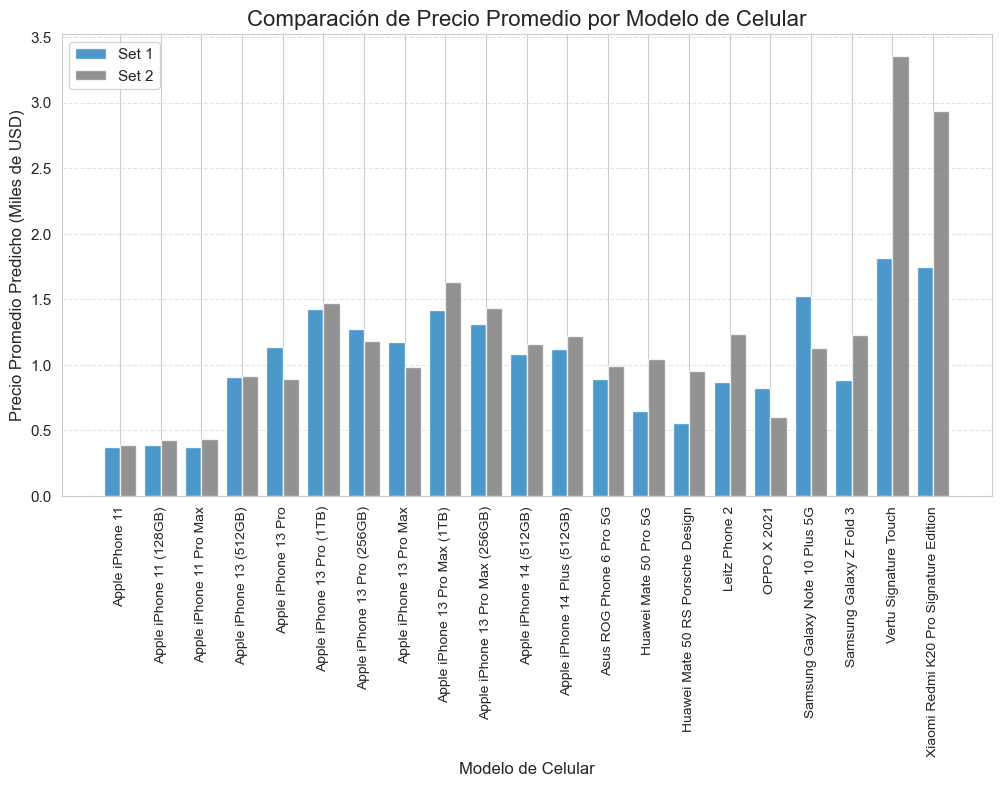

                                    Modelo  Precio Set 1 (K USD)  \
0                          Apple iPhone 11                  0.37   
1                  Apple iPhone 11 (128GB)                  0.39   
2                  Apple iPhone 11 Pro Max                  0.37   
3                  Apple iPhone 13 (512GB)                  0.91   
4                      Apple iPhone 13 Pro                  1.13   
5                Apple iPhone 13 Pro (1TB)                  1.42   
6              Apple iPhone 13 Pro (256GB)                  1.27   
7                  Apple iPhone 13 Pro Max                  1.17   
8            Apple iPhone 13 Pro Max (1TB)                  1.42   
9          Apple iPhone 13 Pro Max (256GB)                  1.31   
10                 Apple iPhone 14 (512GB)                  1.08   
11            Apple iPhone 14 Plus (512GB)                  1.12   
12                 Asus ROG Phone 6 Pro 5G                  0.90   
13                   Huawei Mate 50 Pro 5G      

In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar ambos archivos con precios predichos
datos_prueba_1 = pd.read_excel('Datos_Prueba_Modelo_Real_Predicho.xlsx')
datos_prueba_2 = pd.read_excel('Datos_Prueba_Modelo_Real_Predicho_1.xlsx')

# Calcular el precio promedio por modelo en cada conjunto de datos (convertido a miles)
precio_por_modelo_1 = datos_prueba_1.groupby('model')['predicted_price_usd'].mean() / 1000
precio_por_modelo_2 = datos_prueba_2.groupby('model')['predicted_price_usd'].mean() / 1000

# Unir ambos conjuntos de precios
df_comparativo = pd.DataFrame({
    'Modelo': precio_por_modelo_1.index,
    'Precio Set 1 (K USD)': precio_por_modelo_1.values,
    'Precio Set 2 (K USD)': precio_por_modelo_2.reindex(precio_por_modelo_1.index).values
}).dropna()

# Calcular la diferencia porcentual
df_comparativo['Diferencia %'] = ((df_comparativo['Precio Set 2 (K USD)'] - df_comparativo['Precio Set 1 (K USD)']) / df_comparativo['Precio Set 1 (K USD)']) * 100

# Crear gráfico de barras con colores azul y plomo
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(df_comparativo['Modelo']))

plt.bar(x - bar_width/2, df_comparativo['Precio Set 1 (K USD)'], bar_width, label='Set 1', color='#2E86C1', alpha=0.85)  # Azul
plt.bar(x + bar_width/2, df_comparativo['Precio Set 2 (K USD)'], bar_width, label='Set 2', color='#6E6E6E', alpha=0.75)  # Plomo

# Ajustar formato del gráfico
plt.xlabel('Modelo de Celular')
plt.ylabel('Precio Promedio Predicho (Miles de USD)')
plt.title('Comparación de Precio Promedio por Modelo de Celular')
plt.xticks(x, df_comparativo['Modelo'], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Mostrar tabla de comparación
print(df_comparativo)